# iFood CRM Data Analyst Case



Introduction:

This notebook represents the final project of the course as a Data Analyst (version 2021) of the Codecademy Academy.
A real example published on GitHub is used as an analysis case, it is a company that owns a delivery application that works in Brazil, this company is called iFood.

This case is intended to test your data skills and knowledge to apply as an iFood candidate for Data Analyst Business or Data Advanced Analytics positions.

The key objectives are:
1. Explore the data, don't just graph averages and counts. Provide information, define cause and effect. Provide a better understanding of the characteristic features of the respondents;
2. Propose and describe a customer segmentation based on customer behavior;
3. Create a predictive model that allows the company to maximize profits from the next marketing campaign.

[LINK](https://github.com/nailson/ifood-data-business-analyst-test)

iFood is the lead food delivery app in Brazil, present in over a thousand cities.
Keeping a high customer engagement is key for growing and consolidating the company’s position as the market leader.
Data Analysts working within the data team are constantly challenged to provide insights and value to the company through open scope projects. This case intends to simulate that.
In this case, you are presented a sample dataset, that mocks metainformation on the customer and on iFood campaign interactions with that customer.
It is your challenge to understand the data, find business opportunities & insights and to propose any data driven action to optimize the campaigns results & generate value to the company.




## Goals <a class="anchor" id="Goals"></a>

This notebook contains an analysis on some marketing data. The goal for this project was to do the following:
* Get acquainted with the data
* Data wrangling so it is ready for analysis
* Develop some questions for analysis
* Analyze variables within the data to gain patterns and insights on these questions

Methods:

* [3.1. Big picture.](#section3_1)
* [3.2. Heat map.](#section3_2)
* [3.3. Regression graph: Correlation between quantitative variables.](#section3_3)
* [3.3. Pearson's correlation coefficient.](#section3_3)
* [3.5. Side-by-Side Box Plot Chart: Correlation Between Categorical Variables.](#section3_5)
* [3.6. Hypothesis test: ANOVA with Tukey's Rank Test.](#section3_6)
* [3.7. Stacked bar chart.](#section3_7)
* [3.8. Bar chart side by side.](#section3_8)
* [4.2.2. Pie charts side by side.](#section4_2_2)
* [4.3. Line chart with trend line.](#section4_3)

### 1. Get acquainted with the data <a class="anchor" id="Goals"></a>

#### 1.1. Loading the Data <a class="anchor" id="section1_1"></a>
First, the necessary libraries are loaded into the notebook. The pandas library is used to import data from marketing_data.csv and preview the first five rows of the DataFrame.


In [105]:
# sets up matplotlib with interactive features
%matplotlib notebook
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re

In [106]:
marketing_data = pd.read_csv("marketing_data.csv")
#used for expanding the no o visible columns of dataframe
pd.set_option('display.max_columns', None)
print('RAW GENERAL TABLE:')
display(marketing_data.head())

#If you are sure your code is correct and simple want to get rid of this warning and all other warnings in the notebook do the following:
import warnings
warnings.filterwarnings('ignore')

RAW GENERAL TABLE:


,id,YearBirth,Education,MaritalStatus,Income,Kidhome,Teenhome,DtCustomer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


What is the meaning of these columns: [LINK Mata-data Table](https://github.com/nailson/ifood-data-business-analyst-test/blob/master/dictionary.png?raw=true)

The data in the "income" column shows the "$" sign, this must be removed for the variable to change from an object to an float. In section 2. Data wrangling we solve this problem.

#### 1.2. Column Summary. <a class="anchor" id="section1_1"></a>
First, the necessary libraries are loaded into the notebook. The pandas library is used to import data from marketing_data.csv and preview the first five rows of the DataFrame.

In [107]:
marketing_data.columns

Index(['id', 'YearBirth', 'Education', 'MaritalStatus', 'Income', 'Kidhome',
       'Teenhome', 'DtCustomer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProducts', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

The column headings are difficult to read, they are together in the chain, they also show uppercase and lowercase. In the 2.Data wrangling section we solve this problem.

#### 1.3. General information of the database. <a class="anchor" id="section1_1"></a>

In [108]:
marketing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   2240 non-null   int64 
 1   YearBirth            2240 non-null   int64 
 2   Education            2240 non-null   object
 3   MaritalStatus        2240 non-null   object
 4   Income               2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   DtCustomer           2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProducts      2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

The table has 28 columns, 2240 records per column except the `Revenue` column which has 2216, the data types are 23 integers and 5 objects.
Python usually automatically detects categorical variables as objects. If possible, the variable types should be corrected, for example "Education" and "MaritalStatus" should be strings in order to apply string methods to them. "Income" should be transformed into a quantitative variable in order to perform mathematical and statistical operations on it.
In section 2. Data wrangling we solve this problem.

#### 1.4. How many null each column has.  <a class="anchor" id="section1_1"></a>

In [109]:
# see what columns have missing data
marketing_data.isnull().sum()

id                      0
YearBirth               0
Education               0
MaritalStatus           0
Income                 24
Kidhome                 0
Teenhome                0
DtCustomer              0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProducts         0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

We see that the "Income" column has 24 null records.

#### 1.5. Generate initial descriptive statistics (quantitative variables) . <a class="anchor" id="section1_1"></a>

Descriptive statistics include those that summarize the central tendency, spread, and shape of the distribution of a data set, excluding categorical and quantitative variables that contain NaN values.

In [110]:
print(marketing_data.describe())

                 id    YearBirth      Kidhome     Teenhome      Recency  \
count   2240.000000  2240.000000  2240.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804     0.444196     0.506250    49.109375   
std     3246.662198    11.984069     0.538398     0.544538    28.962453   
min        0.000000  1893.000000     0.000000     0.000000     0.000000   
25%     2828.250000  1959.000000     0.000000     0.000000    24.000000   
50%     5458.500000  1970.000000     0.000000     0.000000    49.000000   
75%     8427.750000  1977.000000     1.000000     1.000000    74.000000   
max    11191.000000  1996.000000     2.000000     2.000000    99.000000   

          MntWines    MntFruits  MntMeatProducts  MntFishProducts  \
count  2240.000000  2240.000000      2240.000000      2240.000000   
mean    303.935714    26.302232       166.950000        37.525446   
std     336.597393    39.773434       225.715373        54.628979   
min       0.000000     0.000000         0.000000

Note: See that only the columns that have numeric data (int64) appear in this description.

In the "Year of birth" column we find at least one person who is over 120 years old, which is not possible, it is an `outlier` record. In the 2.Data wrangling section we solve this problem.


### 2. Data wrangling <a class="anchor" id="section1_1"></a> 
Data wrangling is the process of `cleaning`, `structuring` and `enriching` raw data into a desired format for better decision making in less time. 

2.1. `Structuring`: Column headers are improved by using [snake case format](https://www.ssc.wisc.edu/sscc/pubs/DWE/book/4-2-naming-variables.html) and using regular expressions and list comprehension.

In [111]:
# put all columns into snake case format
marketing_data.columns = [re.sub(r'(?<!^)(?=[A-Z])', '_', x).lower() for x in marketing_data.columns]
print(marketing_data.columns)

Index(['id', 'year_birth', 'education', 'marital_status', 'income', 'kidhome',
       'teenhome', 'dt_customer', 'recency', 'mnt_wines', 'mnt_fruits',
       'mnt_meat_products', 'mnt_fish_products', 'mnt_sweet_products',
       'mnt_gold_products', 'num_deals_purchases', 'num_web_purchases',
       'num_catalog_purchases', 'num_store_purchases', 'num_web_visits_month',
       'accepted_cmp3', 'accepted_cmp4', 'accepted_cmp5', 'accepted_cmp1',
       'accepted_cmp2', 'response', 'complain', 'country'],
      dtype='object')


2.2. `Cleaning`: The data in the "income" column shows the "$" sign, this must be removed for the variable to change from an object to an float. 

In [112]:
#taking dollar sign out of values and convert to float
marketing_data['income'] = marketing_data['income'].replace('[\$,]', '', regex=True).astype(float)


In the section "1.5. Generate initial descriptive statistics" we were not able to analyze the `income` column, we will now.

In [113]:
print(marketing_data.income.describe())

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: income, dtype: float64


Apparently there is an outlier in the max, with a box plot we can check if it is one or more.

<IPython.core.display.Javascript object>


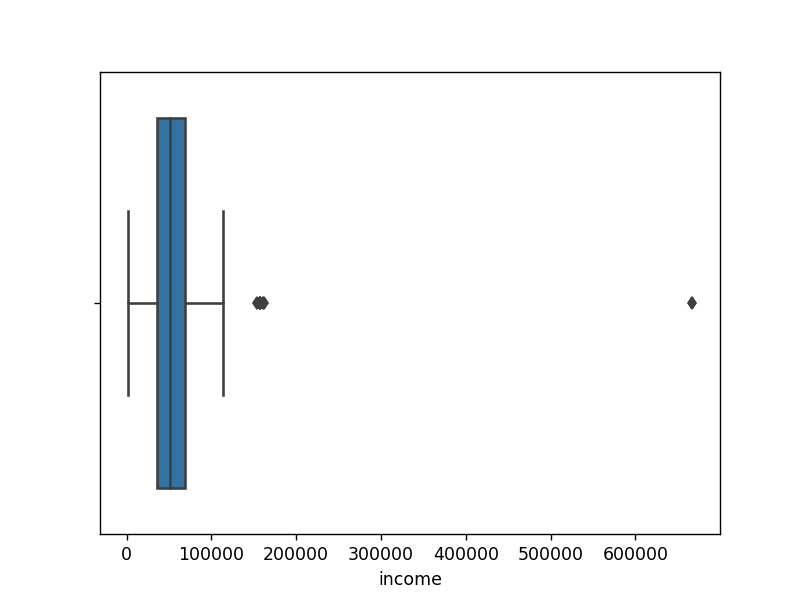

In [114]:
plt.figure()
sns.boxplot(marketing_data["income"])
plt.show()

This boxplot shows a major outlier on the right, so it is removed from the dataset.

<IPython.core.display.Javascript object>


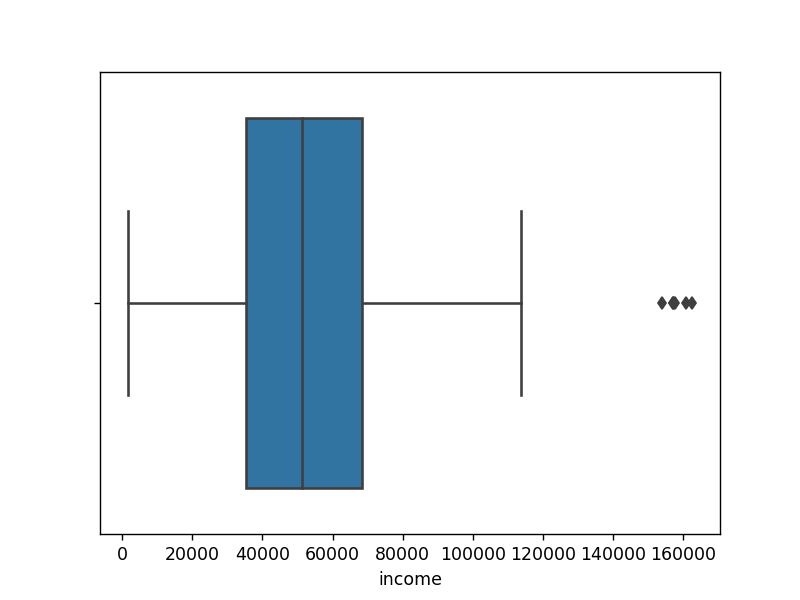

In [115]:
# remove incomes below 300000
marketing_data = marketing_data[marketing_data['income']<300000]

plt.figure()
sns.boxplot(marketing_data["income"])
plt.show()


After removing the outlier, the distribution is more symmetric. There are still some outliers; however, with not major skewness or huge outliers remaining, the `income` variable is ready for analysis.

2.3. `Enriching`: We saw in section 1.4. Since the `income` column had 24 null records, a common practice is to fill these values with the mean, we will do that in the next step.

In [116]:
# replace missing values with the mean income
marketing_data['income'] = marketing_data['income'].fillna(marketing_data['income'].mean())

2.4. `Cleaning:` In section 1.5. we saw for the "YearBirth" column that there is a person who was born in 1893, it is an outlier, we will look for more like these and we will eliminate them.

<IPython.core.display.Javascript object>


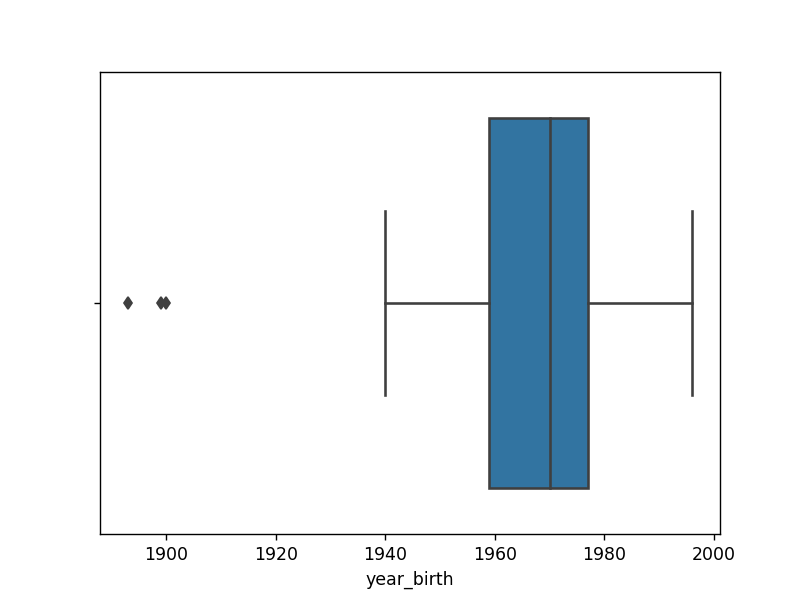

In [117]:
plt.figure()
sns.boxplot(marketing_data["year_birth"])
plt.show()

<IPython.core.display.Javascript object>


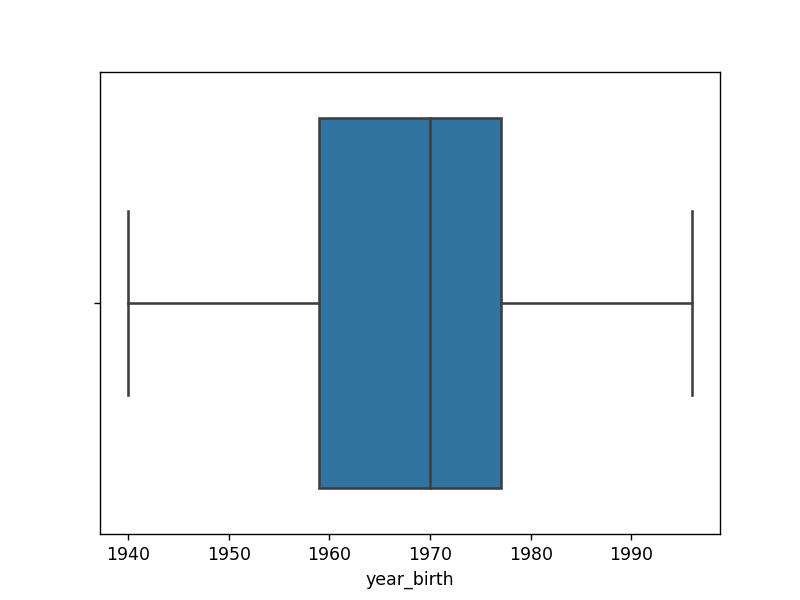

In [118]:
# remove year_birth above 1920
marketing_data = marketing_data[marketing_data['year_birth']>1920]

plt.figure()
sns.boxplot(marketing_data["year_birth"])
plt.show()

Eliminating only 3 data out of more than 200 of the graph is presented centered, thus eliminating an unnecessary bias that modifies statistical parameters such as the mean, the standard deviation and the range.

2.5. `Enrichment:` It is much easier to analyze to be able to see the age of the clients than the date of birth, we will create a new column with the age and add it to the dataframe.

In [119]:
marketing_data['age'] = 2020 - marketing_data['year_birth']

2.6. `Enrichment:` Convert data types that were automatically classified as objects to strings.

In [120]:
marketing_data['education'] = marketing_data['education'].astype("string")
marketing_data['marital_status'] = marketing_data['marital_status'].astype("string")

2.7. `Enrichment:` The `dt_customer` column refers to the date the user first enrolled in the application. It is presented as an object, since the date is in the format MM:DD:YY, it is convenient for its analysis to transform it into a floating number, in addition, it is necessary to transform it so that it is referred to the current year, that is, the amount of elapsed time since the user enrolled in the application until today. To achieve this we will use a lambda function, we will take the original years and months and transform them into a float that contains an integer for the years and the months transformed into years in the decimal part.
We will create a new column in the data frame called `dt_customer_year`.

In [121]:
# We save the original column for further analysis.
dt_customer = marketing_data.dt_customer

marketing_data['dt_customer_year'] = marketing_data.dt_customer.apply(lambda x: 22 - ((int(x.split('/')[2])) + ((int(x.split('/')[0]))/12))).round(2)

2.8 `Structuring`: We will eliminate columns that we have transformed to avoid keeping repeated information.

In [122]:
marketing_data.drop(['year_birth', 'dt_customer'], axis=1, inplace=True)

2.9. `Cleaning:` It is important to check if there are duplicate data, we mean that there is more than one row with values identical to the other.

In [123]:
duplicates = marketing_data.duplicated()
print(duplicates.value_counts())

False    2212
dtype: int64


The result does not give us any amount for True, this means that there are no duplicate rows in the data frame.

### Summary data wrangling <a class="anchor" id="section1_1"></a> 

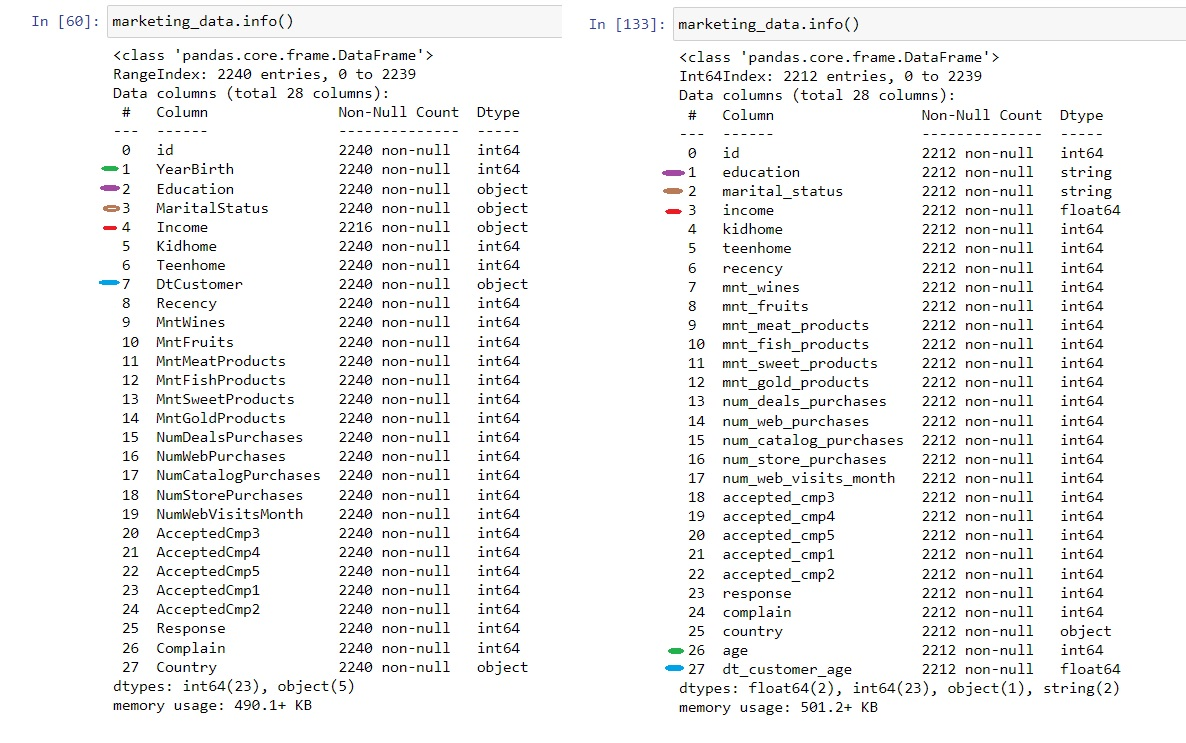

Summary data wrangling

* 2.1 Improve column headers.
* 2.2 Eliminate the `$` sign to be able to transform the `income` column into quantitative. Then find outliers and remove them.
* 2.3 For the `income` column replace the Nan values with the mean.
* 2.4 Remove outliers in the `year_birth` column.
* 2.5 Convert the birthday in the `year_birth` column to the user's years and create a column called `age`.
* 2.6 Convert object data types to string where appropriate.
* 2.7 Convert the `dt_customer` column, which is the user's enrollment date in the application, to the time in years the user has been in the application, create the `dt_customer_year` column.
* 2.8 Remove old columns (`year_birth`, `dt_customer`) to avoid having duplicate information.
* 2.9 Check if there are duplicate rows in the data frame.

###### The data is ready to be analyzed, although it is likely that we will find something to correct in the following.<a class="anchor" id="EDA"></a>

### 3. Exploratory Data Analysis <a class="anchor" id="EDA"></a>

After some data cleaning and tidying, the DataFrame is ready for [EDA](https://www.codecademy.com/paths/data-analyst/tracks/dacp-data-wrangling-and-tidying/modules/dacp-exploratory-data-analysis-for-data-wrangling-and-tidying/articles/what-is-eda). The following independent variables will be focused on in the analysis:
* `income`
* `education`
* `age`

The goal will be to see how these independent variables associate with the following dependent variables:
* `mnt_wines`
* `mnt_fruits`
* `mnt_meat_products`
* `mnt_fish_products`
* `mnt_sweet_products`  
* `mnt_gold_products`  
* `num_deals_purchases`
* `num_web_purchases`  
* `num_catalog_purchases`  
* `num_store_purchases`

#####       The hope is that through summary statistics and visualizations the following question can be answered: <a class="anchor" id="EDA"></a>
####       *Does a shopper's income, education level, and/or age relate to their purchasing behavior? <a class="anchor" id="EDA"></a>

Along the way, this question may be refined and more questions may pop up.

### 3.1. Big Picture<a class="anchor" id="section3_1">
To look at the data set as a whole, we constructed 25 histograms for the quantitative variables and 3 bar charts for the categorical variables.


In [124]:
# With this code snippet the output window (for graphics) will be large and we will be able to see all the outputs without scrolling:

In [125]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


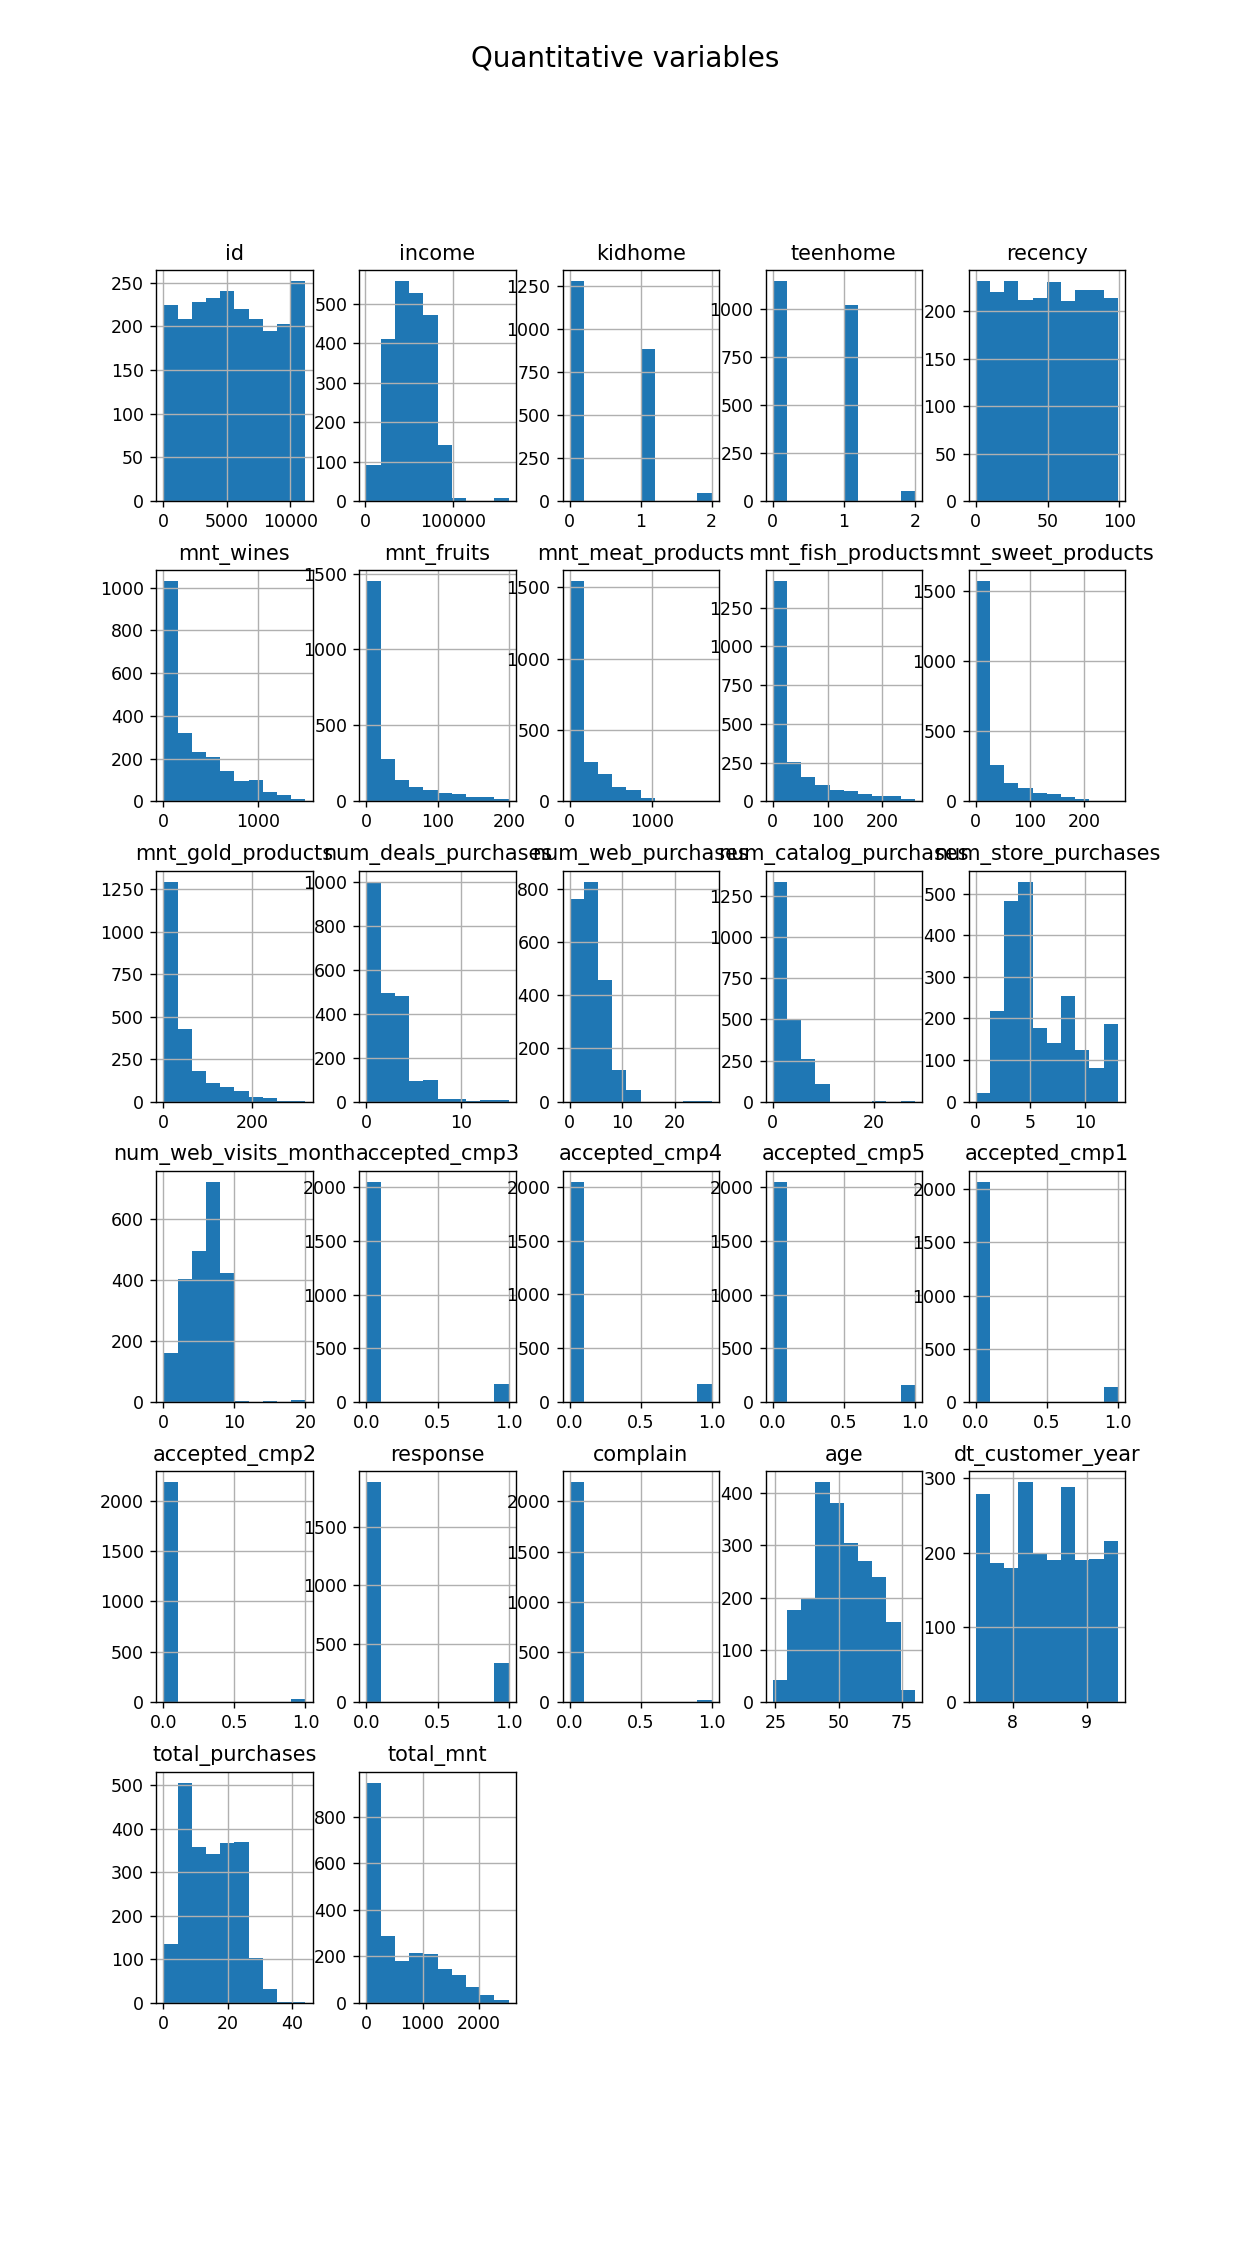

<IPython.core.display.Javascript object>


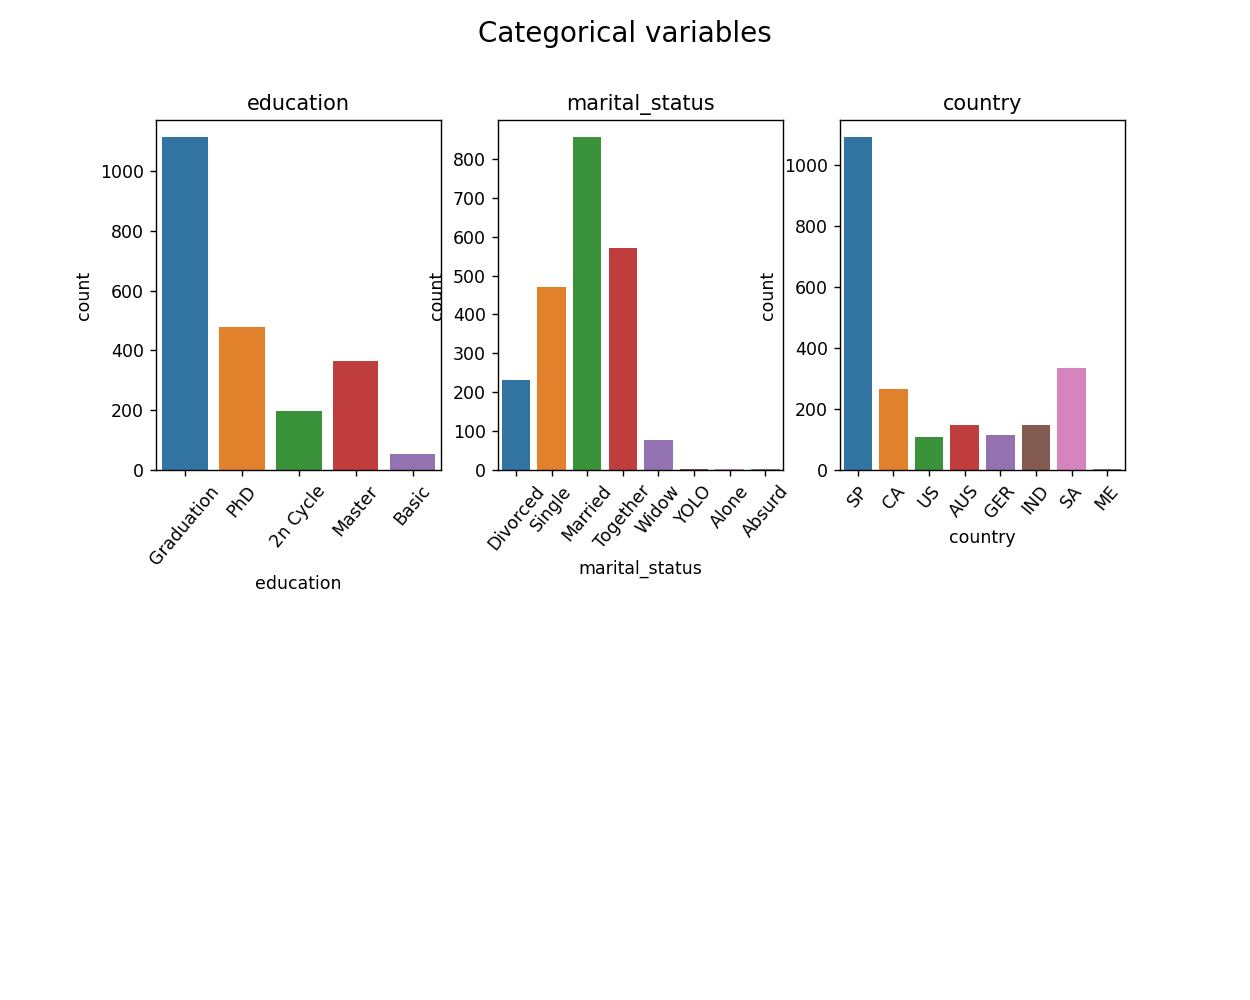

<function matplotlib.pyplot.show(block=None)>

In [163]:
# Quantitative variables.
fig = plt.figure(figsize = (10,18))
ax = fig.gca()
marketing_data.hist(ax = ax);
fig.suptitle('Quantitative variables', fontsize=16)

# Categorical variables.
fig = plt.figure(figsize = (10,8))
plt.subplot(2,3,1)
sns.countplot(marketing_data['education'])
plt.title('education')
plt.xticks(rotation=50)

plt.subplot(2,3,2)
sns.countplot(marketing_data['marital_status'])
plt.title('marital_status')
plt.xticks(rotation=50)


plt.subplot(2,3,3)
sns.countplot(marketing_data['country'])
plt.xticks(rotation=50)
plt.title('country')
fig.suptitle('Categorical variables', fontsize=16)
plt.show


##### What can we observe in these graphs? 
###### Quantitative variables: 
* Identification: We cannot conclude anything, since for this data to be useful we should include the elapsed time. That is, something like number of "id" per year.
* Income: We can see a Normal or Gaussian distribution, the clients of the company have an average income of approximately 50,000 USD and a maximum of 100,000.
* Kidhome - Teenhome: We can say that clients do not have children or only have one.
* Recency: Represents the number of days since the last purchase, we can see a continuous uniform distribution, that is, the frequency of purchase of customers seems to be random, there is no purchase pattern linked to time.
* mnt: It is the average per customer spent in USD on a certain product in the last two years. The company sells 6 different product categories: wines, fruits, meats, fish, sweets, premium "gold" products. The distributions of the histograms are similar, they are skewed to the right, that is, they have a positive bias, in terms of the shape of the curve they seem to comply with a Poisson distribution, where the maximum frequency is found in the minimum values.
The least frequent products are wines, the most frequent are sweets, although if we refer to the amount spent it is the other way around, that is (on the x axis), we can conclude that the products that are sold the most by units are the cheapest.
* num_deals_purchases and num_catalog_purchases: We could say that these variables are opposites, we can't get any meaningful conclusions from these graphs, but it seems that through deals customers are likely to buy more units.
* num_web_purchases and num_store_purchases: These variables are also opposite, purchase through the web or through the physical store, purchases through the web seem to be slightly higher.
* num_web_visits_month: If we compare it with num_web_purchases which refers to the year, then the purchases/visits ratio is approximately 10%, that is, for every 100 visitors to the website, 10 make a purchase.
* accept_cmp1 and following: They are marketing campaigns, the value is 1 if the client accepts the campaign, otherwise it is 0. From what we can see in the graphs, all the campaigns work in the same way except the 2 which is the which gave worse results.
* Answer: 1 if the customer opted for the offer in the last campaign.
* Complaint: 1 if the client complained in the last 2 years, luckily there are very few.
*Age: The age of the clients is very varied and shows a normal distribution, the most frequent age is 45 years, the extremes are 25 and 75.
* dt_customer_year: It is the time in years since the clients registered in the application, what we can see in the graph is that the clients are between 7 and 10 years old, therefore there is no arrival of new clients, that is a serious problem for the company.

###### Categorical variables:
* education: The most frequent clients are graduates, followed by clients with a PhD, it seems that the clients of this company are highly educated.
* marital_status: The most frequent clients are married or together.
* country: The most frequent clients are from Spain.

In [127]:
# This code snippet and the next let you see the whole picture.
from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 44em; }</style>"))


In [128]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

### 3.2. Heat map: <a class="anchor" id="section3_2">
This graph will allow us to discover if there is any relationship between quantitative variables.

<IPython.core.display.Javascript object>


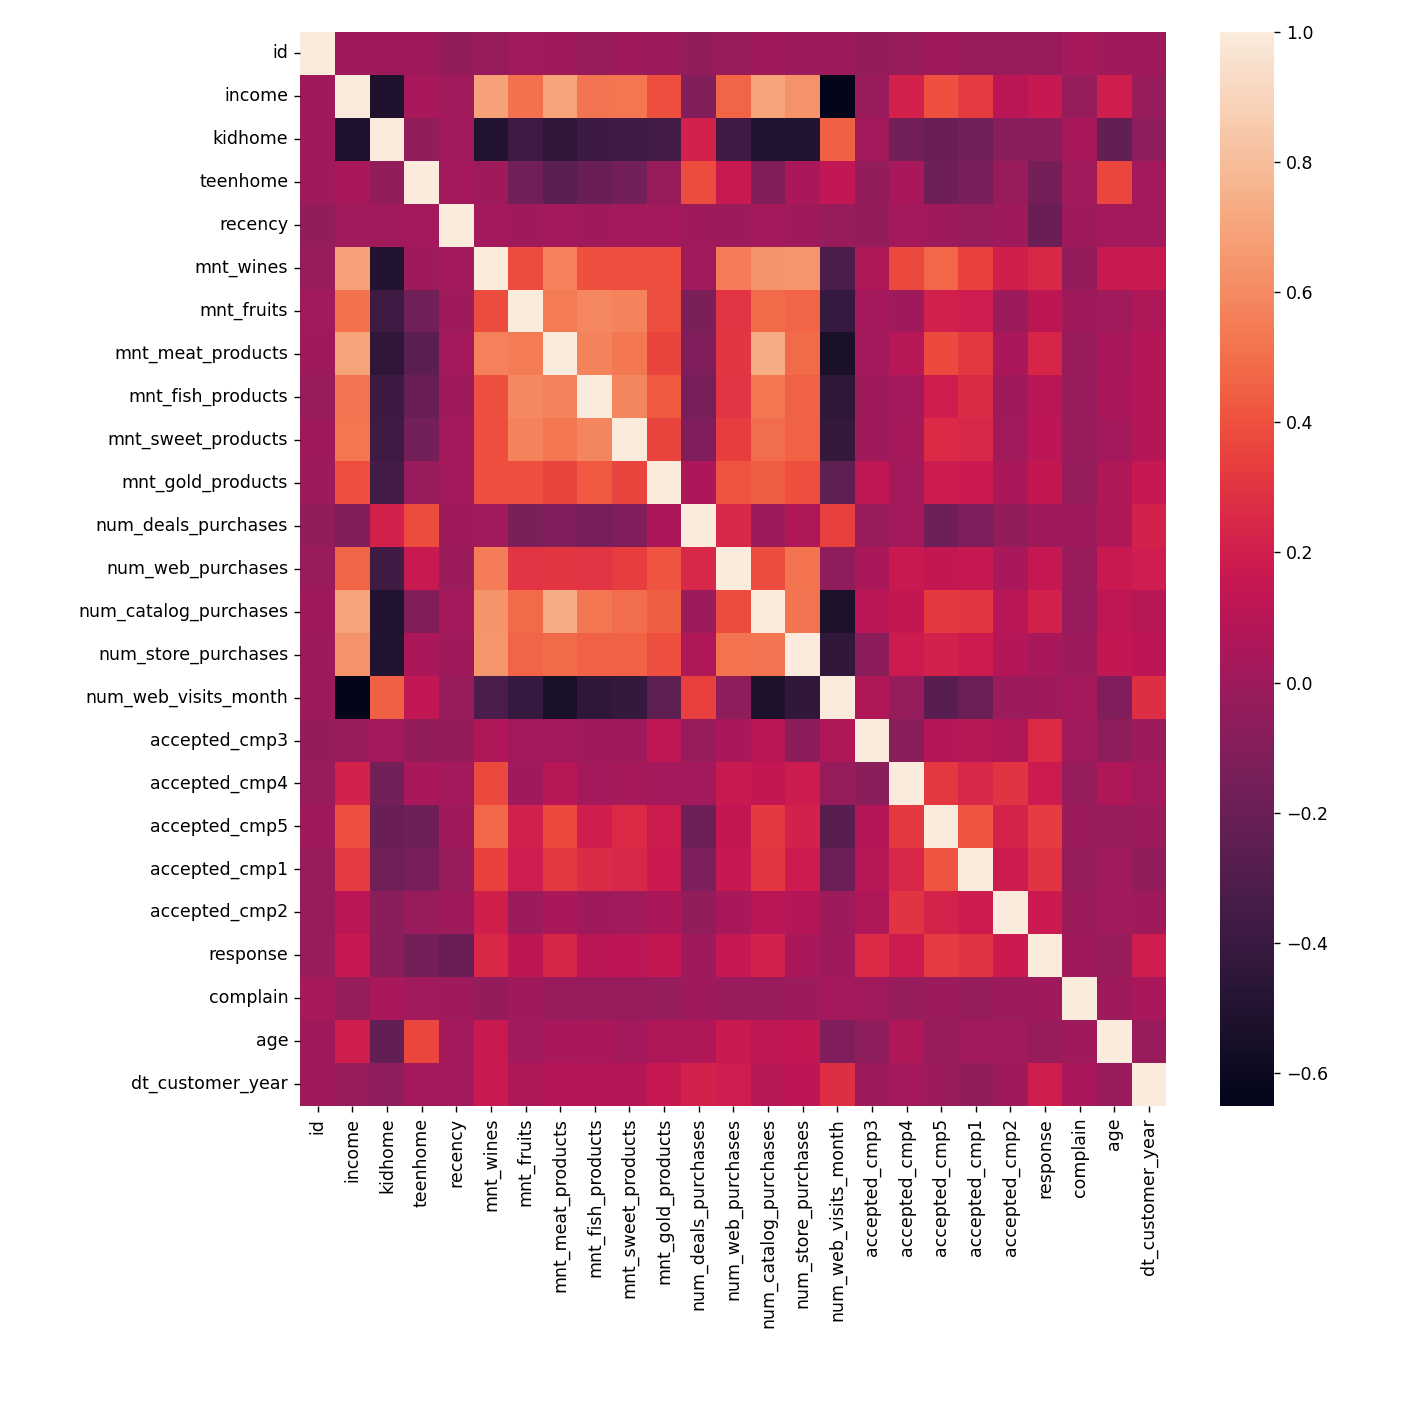

In [129]:
plt.figure(figsize=(9,9))
# heat matrix that shows correlation across all numerical variables
sns.heatmap(data=marketing_data.corr(),annot=False)
plt.tight_layout()
plt.show()


##### Heat map:
Light colors indicate positive correlation, dark colors indicate negative correlation, we will analyze those that present greater contrast.
* income - kidhome: There is a negative correlation, the more children, the less income.
* income - mnt: As expected, we can see a band of light colors for the amounts spent of the 6 product categories, we see that wines and meats stand out more than the rest, that is, customers who have higher income spend more on products such as meat or wine.
* kidhome - mnt: We can see that the amounts spent are inversely correlated with customers who have children at home. This inverse correlation with a stronger dark color stands out in the case of mnt_wines vs kidhome (this is obvious).
* kidhome - income - num: num refers to the amount of purchases through the different sales channels of the company, (except "num_web_visits_month"). Earlier we saw that income and kidhome are negatively correlated, this is also true with respect to num, i.e. income increases when num increases and num decreases when kidhome increases.
* num_web_visits_month: It is contradictory to see how num_web_visits_month is negatively correlated with: revenue, mnt (amounts spent on all product categories), num (amount of purchases made by different sales channels).
* mnt _ num: We can see that the amounts spent on the different product categories are positively correlated with the number of purchases in the company's different sales channels.

###### Finally we can get some conclusions without doing a very deep analysis.
* Children do not favor the business model.
* Targeting higher income customers seems like a good strategy.
* The age of the clients is not important.
* The number of visits to the website does not ensure sales.

###### 3.3. Purchasing Behavior by Income: <a class="anchor" id="section3_3">


We could see in section 3.2. that customer income is an important variable in terms of purchases. To better see the correlation of purchases and income, we will create a linear regression graph where we will include the different purchase channels and income.


Note: See Note 1 adds something about linear correlation.

 * [Note 1](#section6_1)

<IPython.core.display.Javascript object>


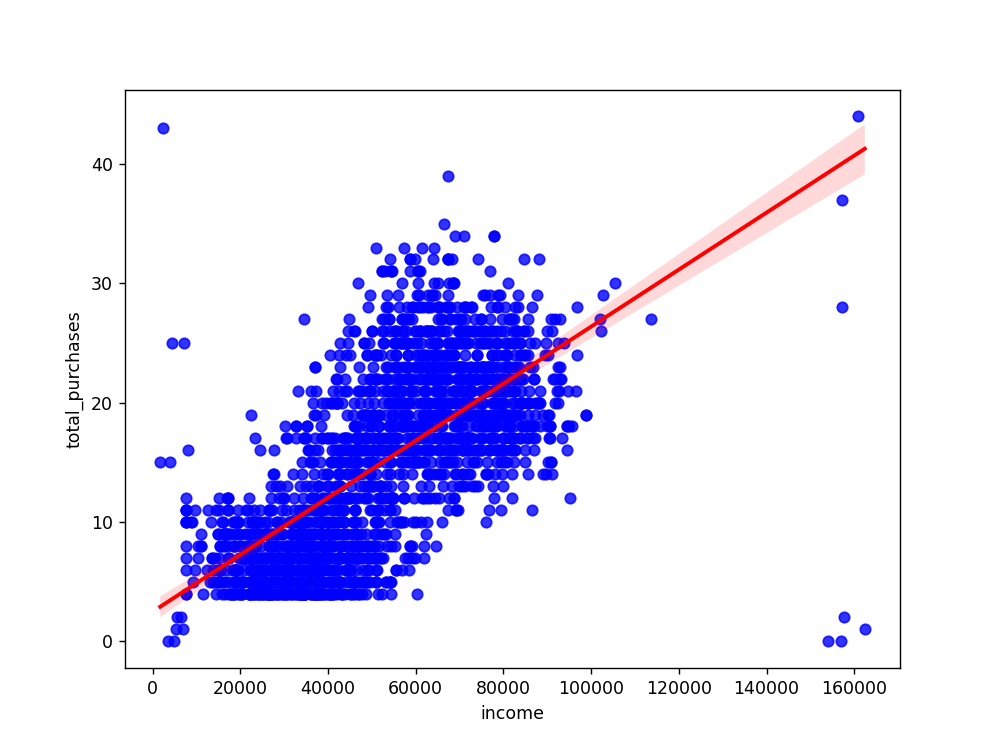

In [130]:
# add new total_purchases column to marketing_data
marketing_data["total_purchases"] = marketing_data["num_deals_purchases"] + marketing_data["num_catalog_purchases"] + marketing_data["num_web_purchases"] + marketing_data["num_store_purchases"]
plt.figure()
# regression plot of total_purchases vs income
sns.regplot(y=marketing_data["total_purchases"], x=marketing_data["income"], 
            scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.show()

In the linear regression scatterplot we can see a strong correlation between `purchase_total` and `revenue`. It is necessary to substantiate numerically what we see in the graphs, for this we will use the Pearson correlation coefficient. We are also interested in knowing which of the `total_purchase` components contributes the most to this result.

###### Note: A correlation greater than about 0.6 suggests a strong linear association.

In [131]:
from scipy.stats import pearsonr
list_purchases = ["total_purchases","num_deals_purchases","num_catalog_purchases","num_web_purchases","num_store_purchases"]
for i in list_purchases:
  correlation,p = pearsonr(marketing_data[i], marketing_data["income"])
  print(i + " = "  + str(correlation.round(3)))

total_purchases = 0.67
num_deals_purchases = -0.108
num_catalog_purchases = 0.697
num_web_purchases = 0.459
num_store_purchases = 0.631


`num_catalog purchases` is the one with the highest relationship with respect to income.

###### 3.4. Amount spent by income: 

Continuing with the objectives stated at the beginning of the 3. Exproratory Data Analysis section, we want to study the relationship between independent and dependent variables. This is the turn of amounts spent and income, we will do it following the scheme of the previous analysis (3.3. Purchasing Behavior by Income).

<IPython.core.display.Javascript object>


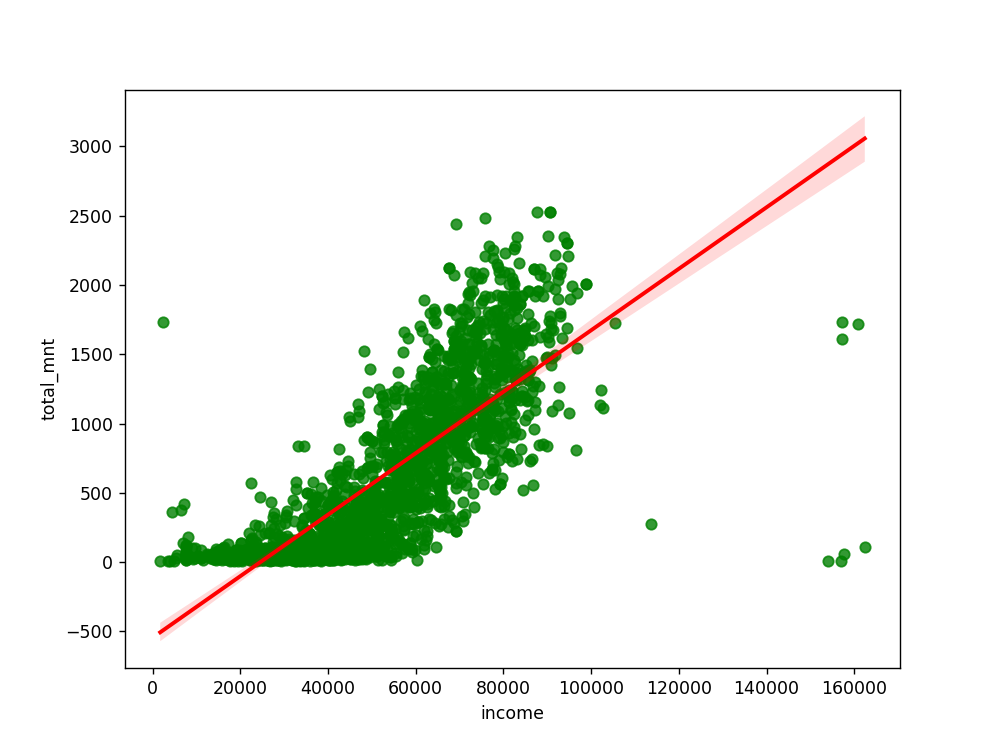

In [132]:
# add new total_mnt column to marketing_data
marketing_data["total_mnt"] = marketing_data["mnt_wines"] + marketing_data["mnt_fruits"] + marketing_data["mnt_meat_products"] + marketing_data["mnt_fish_products"] + marketing_data["mnt_sweet_products"] + marketing_data["mnt_gold_products"] 
plt.figure()
# regression plot of total_mnt vs income
sns.regplot(y=marketing_data["total_mnt"], x=marketing_data["income"], 
            scatter_kws={"color": "green"}, line_kws={"color": "red"})
plt.show()

In [133]:
from scipy.stats import pearsonr
list_purchases = ["total_mnt","mnt_wines","mnt_fruits","mnt_meat_products","mnt_fish_products","mnt_sweet_products","mnt_gold_products"]
for i in list_purchases:
  correlation,p = pearsonr(marketing_data[i], marketing_data["income"])
  print(i + " = "  + str(correlation.round(3)))

total_mnt = 0.793
mnt_wines = 0.688
mnt_fruits = 0.507
mnt_meat_products = 0.692
mnt_fish_products = 0.52
mnt_sweet_products = 0.524
mnt_gold_products = 0.388


We already saw it in section 3.2. heatmap, now we confirm it, `mnt_meat_products` and `mnt_wines` are the variables that have a stronger correlation with `income`.

###### 3.5. Purchasing behavior by education: <a class="anchor" id="section3_5">


Continuing with the objectives set at the beginning of section 3. Exploratory data analysis, we want to study the relationship between the independent and dependent variables. This is the turn of purchases and education, in this case we have a quantitative variable and a categorical one, the correlation analysis will be different from the previous one.

Note: The technique to compare two variables, one quantitative and the other categorical, is performed by creating fragments of data sets of the quantitative variable divided according to the changes in the records of the categorical variable.
Later, by comparing the difference or distance between the mean, median, Side-by-Side Box Plots, Overlapping Histograms, or making a hypothesis test of these fragments of data sets, we can know how correlated the variables are.
"What we want to demonstrate is that the quantitative variable changes significantly when it is divided according to the categorical variable, this indicates a strong correlation between variables.
In order to say that the variables are strongly correlated, 50% of the data (interquartile range) must not coincide.
See the following image of a Side-by-Side Box Plots chart:
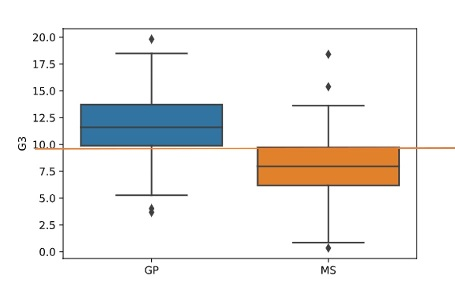

<IPython.core.display.Javascript object>


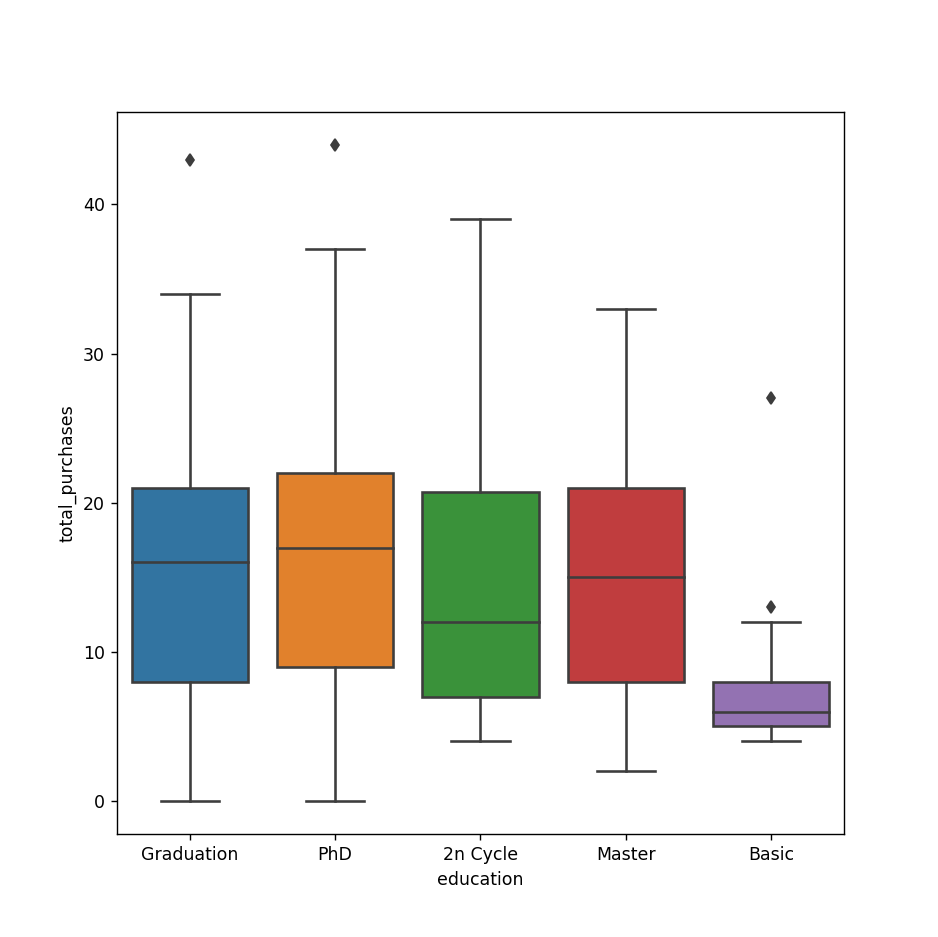

In [134]:
plt.figure(figsize=(6,6))
sns.boxplot(x=marketing_data["education"],y=marketing_data["total_purchases"])
plt.show()

We can see that all the box plots for all the educational categories are not shifted except for the basic cycle. So is there a correlation between education and the amount of purchases? We could say yes, if the basic cycle is greater than or equal to 50% of the clients. Let's find out.

In [135]:
table_of_proportions = ((marketing_data["education"].value_counts())*100)/len(marketing_data["education"])
print(table_of_proportions.round())

Graduation    50.0
PhD           22.0
Master        17.0
2n Cycle       9.0
Basic          2.0
Name: education, dtype: Float64


The Basic cycle represents 2% of the total. Therefore, we can conclude that the educational level of customers does not have a strong correlation with purchases.

Since purchases are directly related to the amount spent, we will omit the analysis for this case.

###### 3.6. Income and education: 
In this case we will analyze two independent variables, their understanding is a fundamental part of this analysis.
What we want to know is if the level of education is related to your level of income.

Note: See Note 2 for:

How to select the correct hypothesis test.

The assumptions that must be taken into account before applying the hypothesis test.

 * [Note 2](#section6_2)

Check assumptions:

A) Answer: We assume that the observations are randomly sampled independently of the population.

B) Are the standard deviations of the groups the same?

In [136]:
income_graduation = marketing_data.income[marketing_data.education == "Graduation"]
income_PhD = marketing_data.income[marketing_data.education == "PhD"]
income_2nC = marketing_data.income[marketing_data.education == "2n Cycle"]
income_Master = marketing_data.income[marketing_data.education == "Master"]
income_Basic = marketing_data.income[marketing_data.education == "Basic"]

print("graduation_std = " + str(np.std(income_graduation)))
print("PhD_std = " + str(np.std(income_PhD)))
print("2nC_std = " + str(np.std(income_2nC)))
print("Master_std = " + str(np.std(income_Master)))
print("Basic_std = " + str(np.std(income_Basic)))


graduation_std = 21344.738877446027
PhD_std = 20574.96355575785
2nC_std = 22143.14854109802
Master_std = 20130.155681629374
Basic_std = 6177.064891477617


B) Answer: Basic_std differs a lot from the rest. We will reduce this difference in the next step.

C) Is the data normally distributed?

<IPython.core.display.Javascript object>


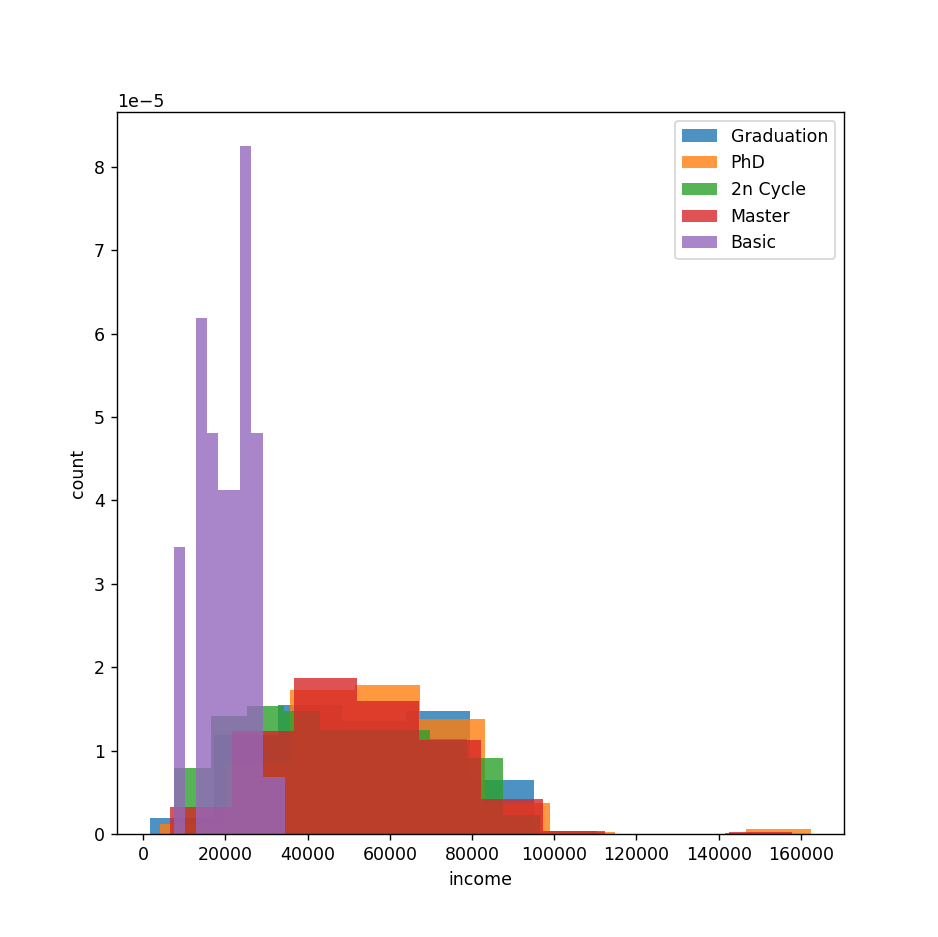

In [137]:
plt.figure(figsize=(6,6))
plt.hist(income_graduation, alpha = 0.8, density = True, label = "Graduation")
plt.hist(income_PhD, alpha = 0.8, density = True, label = "PhD")
plt.hist(income_2nC, alpha = 0.8, density = True, label = "2n Cycle")
plt.hist(income_Master, alpha = 0.8, density = True, label = "Master")
plt.hist(income_Basic, alpha = 0.8, density = True, label = "Basic")

plt.xlabel("income")
plt.ylabel("count")
plt.legend()
plt.show()

C) Answer: Basic_std differs from the normal distribution, we won't be able to do much about it. What we can do is remove some outliers from the other educational levels to get closer to the normal distribution.


<IPython.core.display.Javascript object>


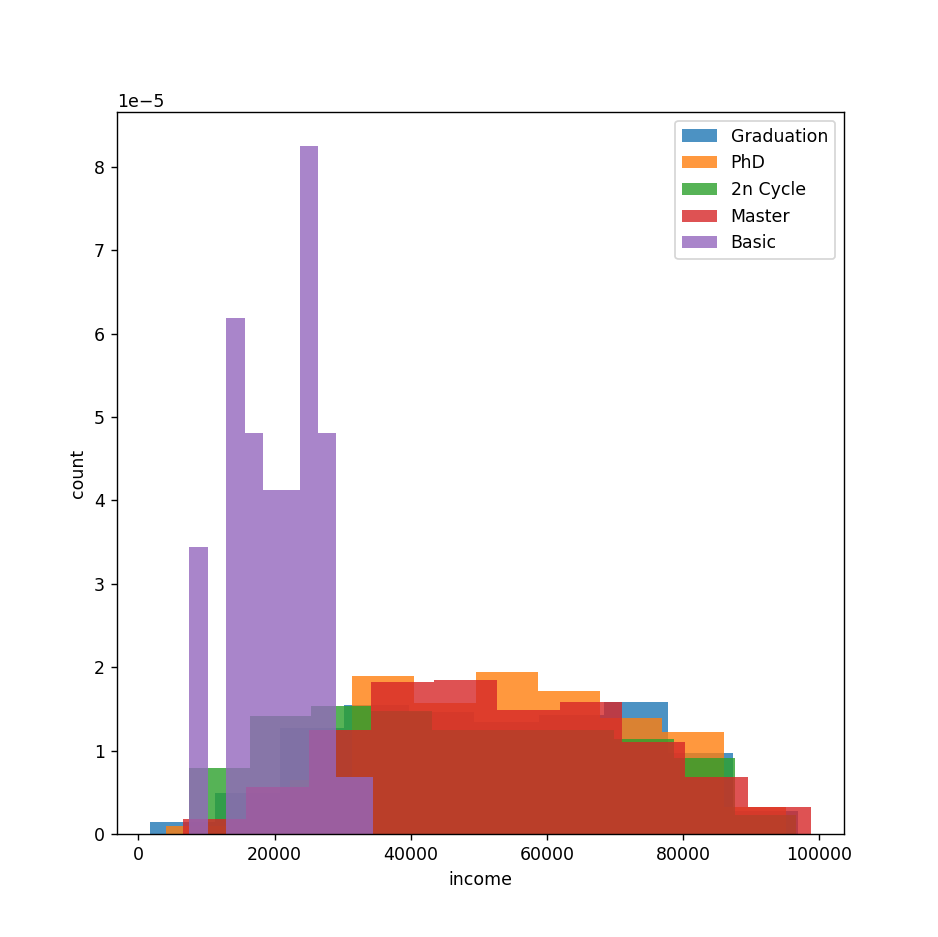

In [138]:
# We create a new dataframe where we only want to have incomes less than 100,000.

income_m = marketing_data[marketing_data["income"]<100000]
# We create individual dataframes for each educational level.

income_graduation = income_m.income[income_m.education == "Graduation"]
income_PhD = income_m.income[income_m.education == "PhD"]
income_2nC = income_m.income[income_m.education == "2n Cycle"]
income_Master = income_m.income[income_m.education == "Master"]
income_Basic = income_m.income[income_m.education == "Basic"]

# We plot the overlaid histograms again.

plt.figure(figsize=(6,6))
plt.hist(income_graduation, alpha = 0.8, density = True, label = "Graduation")
plt.hist(income_PhD, alpha = 0.8, density = True, label = "PhD")
plt.hist(income_2nC, alpha = 0.8, density = True, label = "2n Cycle")
plt.hist(income_Master, alpha = 0.8, density = True, label = "Master")
plt.hist(income_Basic, alpha = 0.8, density = True, label = "Basic")

plt.xlabel("income")
plt.ylabel("count")
plt.legend()
plt.show()


After this last change we have improved as far as possible, the standard deviation and the distributions are more similar to the normal distribution.

D) Answer: We consider the groups created by the categorical variable to be independent.

We will select the appropriate hypothesis test in our case, we have a quantitative variable (income) and a non-binary categorical variable (education), our method is: ANOVA with Tukey's Range Test.

##### We will run a hypothesis test to address the following null and alternative hypotheses. <a class="anchor" id="section3_6">
* Null Hypothesis: All educational levels receive the same average income.
* Alternative Hypothesis: Not all educational levels receive the same average income (at least one educational level has an average income significantly different from the rest).

###### ANOVA (Analysis of variance).
ANOVA tests the null hypothesis that all groups have the same population mean.

In Python, we can use the SciPy `f_oneway()` function to perform an ANOVA.

`f_oneway()` has two outputs: the F-statistic and the p-value.

If the p-value (pval) is below our significance threshold (0.05), we can conclude that at least a couple of our educational levels obtained significantly different mean income values; However, until now we do not know which pair(s) are.
To know which pairs of educational levels are different. This is where Tukey's test comes in handy!

In [139]:
# Run an ANOVA
from scipy.stats import f_oneway
Fstat, pval = f_oneway(income_graduation,income_PhD,income_2nC,income_Master,income_Basic)
print(pval)

1.1794483062595657e-31


If reject is True it means that the Null Hypothesis should be rejected in this comparison.

In [140]:
# Run Tukey's Range Test
from statsmodels.stats.multicomp import pairwise_tukeyhsd
output = pairwise_tukeyhsd(income_m.income,income_m.education)
print(output)

         Multiple Comparison of Means - Tukey HSD, FWER=0.05          
  group1     group2     meandiff  p-adj    lower       upper    reject
----------------------------------------------------------------------
  2n Cycle      Basic -27319.0741  0.001  -35659.28 -18978.8682   True
  2n Cycle Graduation    4219.773 0.0475    28.7913   8410.7547   True
  2n Cycle     Master   5004.2463 0.0359   207.0129   9801.4797   True
  2n Cycle        PhD   7372.7743  0.001  2775.8341  11969.7144   True
     Basic Graduation   31538.847  0.001 23968.3552  39109.3389   True
     Basic     Master  32323.3204  0.001 24401.1068   40245.534   True
     Basic        PhD  34691.8483  0.001 26889.2925  42494.4042   True
Graduation     Master    784.4734    0.9 -2496.8009   4065.7477  False
Graduation        PhD   3153.0013  0.032   172.2008   6133.8018   True
    Master        PhD   2368.5279 0.4309 -1417.5376   6154.5934  False
----------------------------------------------------------------------


All earnings averages are significantly different, except for the Graduation - Master, Master - PhD comparison.

###### 3.7. Purchasing Behavior by age: 

3.7.1. Analyze the correlation between purchases and age with linear regression and scatter plot.

<IPython.core.display.Javascript object>


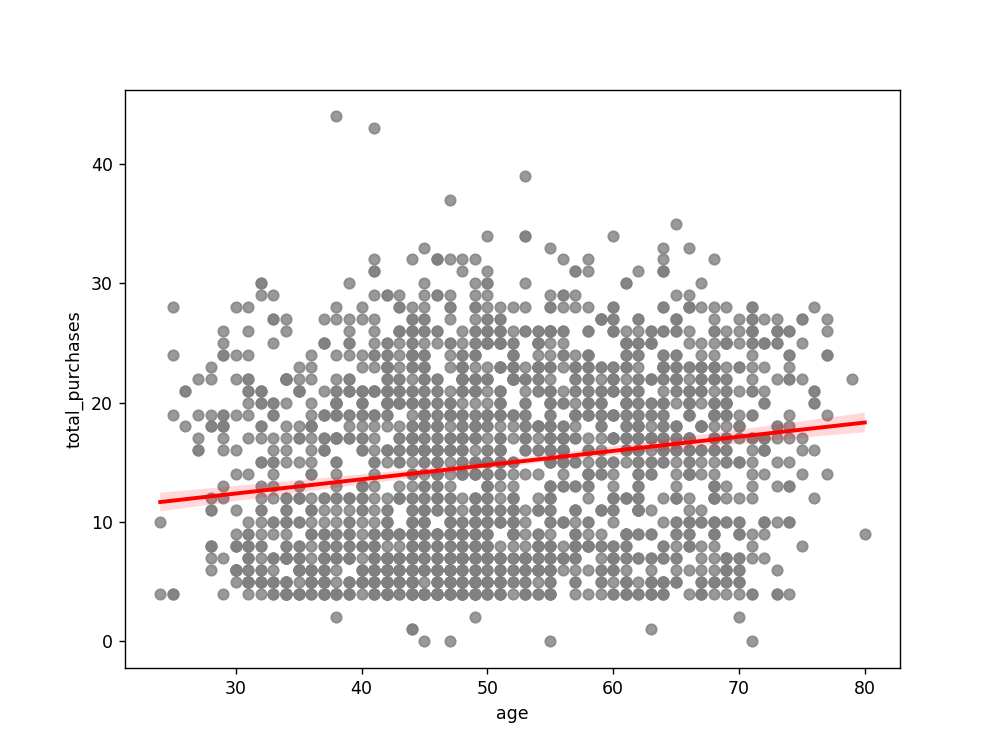

In [141]:
""" We will use `total purchases", which is the column created in section 3.3. 
In it we add up all types of purchases ("num_deals_purchases", "num_catalog_purchases", 
"num_web_purchases", "num_store_purchases")."""

plt.figure()
# regression plot of total_purchases vs income
sns.regplot(y=marketing_data["total_purchases"], x=marketing_data["age"], 
            scatter_kws={"color": "gray"}, line_kws={"color": "red"})
plt.show()

From the distribution of the points on the scatter plot, we see that there is almost no pattern between total purchases and age. Also, because the linear regression line is practically horizontal, it indicates low correlation between variables. In any case, we will verify with the Pearson correlation coefficient, if this coefficient is equal to 0.3 there is a linear correlation, if it is greater than 0.6 it suggests a strong linear association.

In [142]:
correlation,p = pearsonr(marketing_data["total_purchases"], marketing_data["age"])
print("pearson" + " = "  + str(correlation.round(3)))

pearson = 0.182


The value obtained is much lower than 0.3, therefore there is no linear correlation, we assume that there is no other type than linear by the scatter plot.

3.7.2. Break down the information to find a pattern.

In [143]:
# function that breaks up each age into a group
def age_groups(age):
    if 18 <= age <= 35 : 
        return '18 to 35' 
    elif 35 < age <= 50 : 
        return '36 to 50'
    elif 50 < age <= 70 : 
        return '51 to 70'
    else : 
        return '71 and Older'

# applying the function to the dataframe
marketing_data['age_group'] = marketing_data['age'].apply(age_groups)


In [144]:
""" Create a new data frame (age_group) that includes the age groups and the sum of the total purchases. 
Then, add columns with the sums of the rest of the types of purchases. """

age_group = marketing_data.groupby('age_group').total_purchases.sum().reset_index()
age_group["num_deals_purchases"] = marketing_data.groupby('age_group').num_deals_purchases.sum().values
age_group["num_catalog_purchases"] = marketing_data.groupby('age_group').num_catalog_purchases.sum().values
age_group["num_web_purchases"] = marketing_data.groupby('age_group').num_web_purchases.sum().values
age_group["num_store_purchases"] = marketing_data.groupby('age_group').num_store_purchases.sum().values

# Let's remove the first two columns that we don't need.
age_group_drop = age_group.drop(age_group.columns[:2],axis = 1)

Visualize with a bar graph the amount of total purchases by age group.

<IPython.core.display.Javascript object>


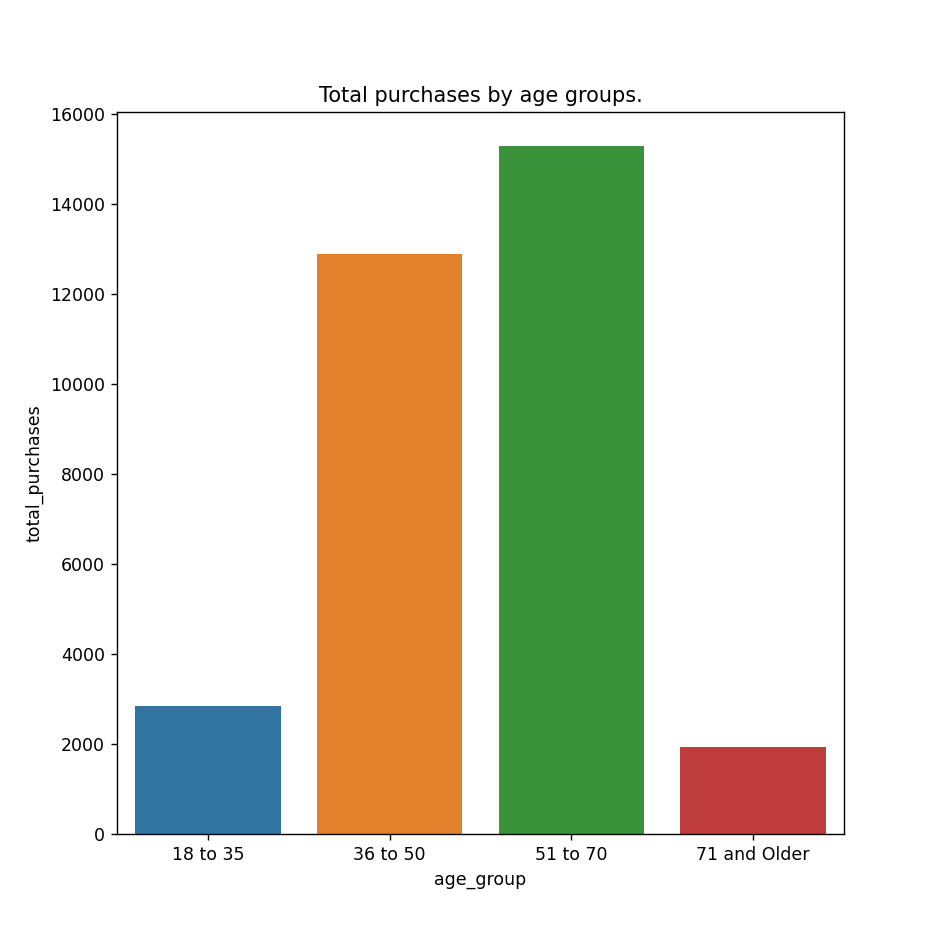

<function matplotlib.pyplot.show(block=None)>

In [145]:
fig = plt.figure(figsize = (6,6))
sns.barplot(age_group['age_group'], age_group['total_purchases'])
plt.xticks(rotation=0)
plt.title('Total purchases by age groups.')

plt.show

Here we have found relevant information, the largest number of buyers are people ranging from 36 to 70 years.

We will see in a stacked bar chart how the previous bars are composed, that is, what method of purchase the different ages use.<a class="anchor" id="section3_7">

In [146]:
""" Create a new data frame (age_group) that includes the age groups and the sum of the total purchases. 
Then, add columns with the sums of the rest of the types of purchases. """

age_group = marketing_data.groupby('age_group').total_purchases.sum().reset_index()
age_group["num_deals_purchases"] = marketing_data.groupby('age_group').num_deals_purchases.sum().values
age_group["num_catalog_purchases"] = marketing_data.groupby('age_group').num_catalog_purchases.sum().values
age_group["num_web_purchases"] = marketing_data.groupby('age_group').num_web_purchases.sum().values
age_group["num_store_purchases"] = marketing_data.groupby('age_group').num_store_purchases.sum().values

# Let's remove the first two columns that we don't need.
age_group_drop = age_group.drop(age_group.columns[:2],axis = 1)

<IPython.core.display.Javascript object>


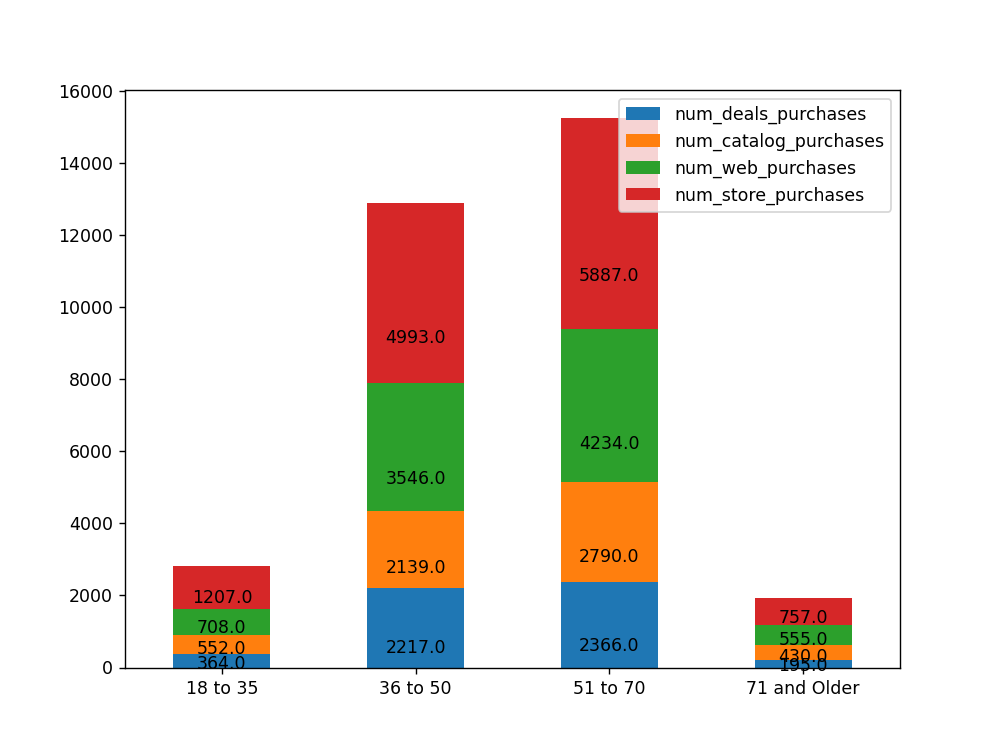

In [147]:
# Labels for the x axis.
x_labels = list(age_group["age_group"])


# Import libraries

import matplotlib.pyplot as plt
import pandas as pd

# Define Data


df = age_group_drop

Class = x_labels

# Plot stacked bar chart

ax = df.plot(stacked=True, kind='bar')


for bar in ax.patches:
    height = bar.get_height()
    width = bar.get_width()
    x = bar.get_x()
    y = bar.get_y()
    label_text = height
    label_x = x + width / 2
    label_y = y + height / 4
    ax.text(label_x, label_y, label_text, ha='center',    
            va='center')


# Set Tick labels


ax.set_xticklabels(Class,rotation='horizontal')

# Display chart


plt.show()

Observations:

The chosen purchase method is independent of the age range.
Store_purchases is preferred first, then web_purchases, then catalog_purchases, and finally deals_purchases. There is one small exception in the 36 to 50 range, where deals_purchases is preferred over catalog_purchases.

###### 3.8. Amounts spent behavior by age. <a class="anchor" id="section3_8">

In [148]:
# new dataframe that is age and purchase amounts columns
age_plus_amounts = marketing_data.loc[:, ('age', 'mnt_wines', 'mnt_fruits', 'mnt_meat_products', 'mnt_fish_products', 
'mnt_sweet_products', 'mnt_gold_products')]
# breaking up the age bins
bins = [18, 35, 50, 70, 150]
# age group labels
labels = ['18 to 35', '36 to 50', '51 to 70', '71 and Older']

# adding age group to the new dataframe as rows
age_plus_amounts['age_group'] = pd.cut(age_plus_amounts.age, bins=bins, labels=labels)
age_plus_amounts = age_plus_amounts.groupby('age_group').sum().reset_index()

In [149]:
print(age_plus_amounts)

      age_group    age  mnt_wines  mnt_fruits  mnt_meat_products  \
0      18 to 35   6957      56038        6642              44974   
1      36 to 50  41074     237527       22553             137596   
2      51 to 70  57225     329022       25336             159619   
3  71 and Older   7747      52709        3710              27281   

   mnt_fish_products  mnt_sweet_products  mnt_gold_products  
0               8801                6648               9271  
1              32303               23731              37050  
2              36399               25433              45998  
3               5776                4015               4845  


<IPython.core.display.Javascript object>


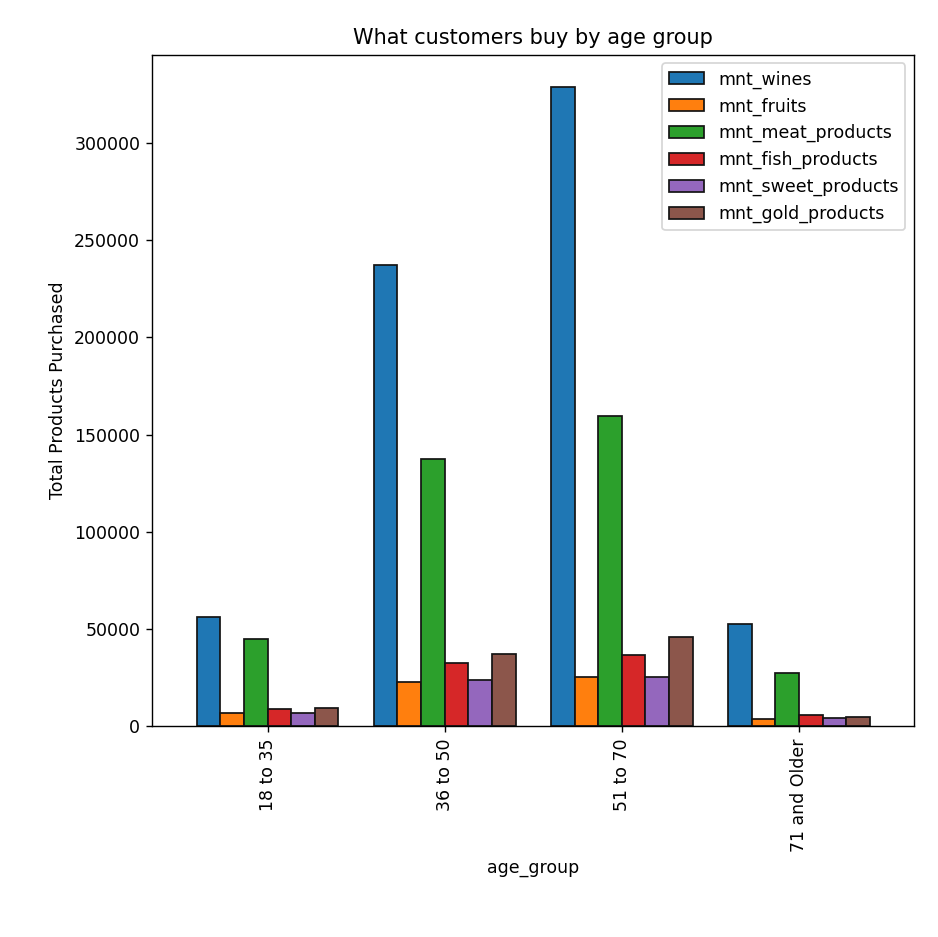

In [150]:
fig, ax = plt.subplots(figsize=(6, 6))

col_products = [
'mnt_wines', 
'mnt_fruits', 
'mnt_meat_products', 
'mnt_fish_products', 
'mnt_sweet_products', 
'mnt_gold_products'
]

# bar graph of amount of items bought in the store grouped by age group
age_plus_amounts.plot(x='age_group', y=col_products, kind='bar', ax=ax,  width=0.8, edgecolor='#131313')
plt.title("What customers buy by age group")
plt.ylabel("Total Products Purchased")
plt.tight_layout()
plt.show()

Across the board, age_group does not seem to effect purchasing habits. Wine is the most popular bought item for each age group followed by meat products. The least popular bought item is fruits for each age group. The next analysis of interest is to see if age_group affects how many items customers buy each time.

#### 4. Analysis of other important data.

######  4.1. Results from existing marketing campaigns

The Accepted Cmp 1,2,3,4 and 5 columns of the original data frame are marketing campaigns, we are going to analyze them to know which one we can repeat and which one we can discard.

In [151]:
display((marketing_data.loc[:, ('accepted_cmp1', 'accepted_cmp2', 'accepted_cmp3', 'accepted_cmp4', 'accepted_cmp5')]).sum())

accepted_cmp1    142
accepted_cmp2     30
accepted_cmp3    163
accepted_cmp4    164
accepted_cmp5    161
dtype: int64

The best campaign was 4 and the worst was 2.

###### 4.2. Kidhome - income - amounts spent :

In section 3.2 of the heat map we saw a negative correlation between income and the number of children in the household, also with respect to the amount spent. Let's investigate further.

In [152]:
#Total number of children in this database.
total_kids =(marketing_data.kidhome).sum()
print("Total kids in the database: " + str(total_kids))

Total kids in the database: 977


4.2.1. Kidhome - income.

We will check the association between the number of children and the income of each family with a linear regression graph.

<IPython.core.display.Javascript object>


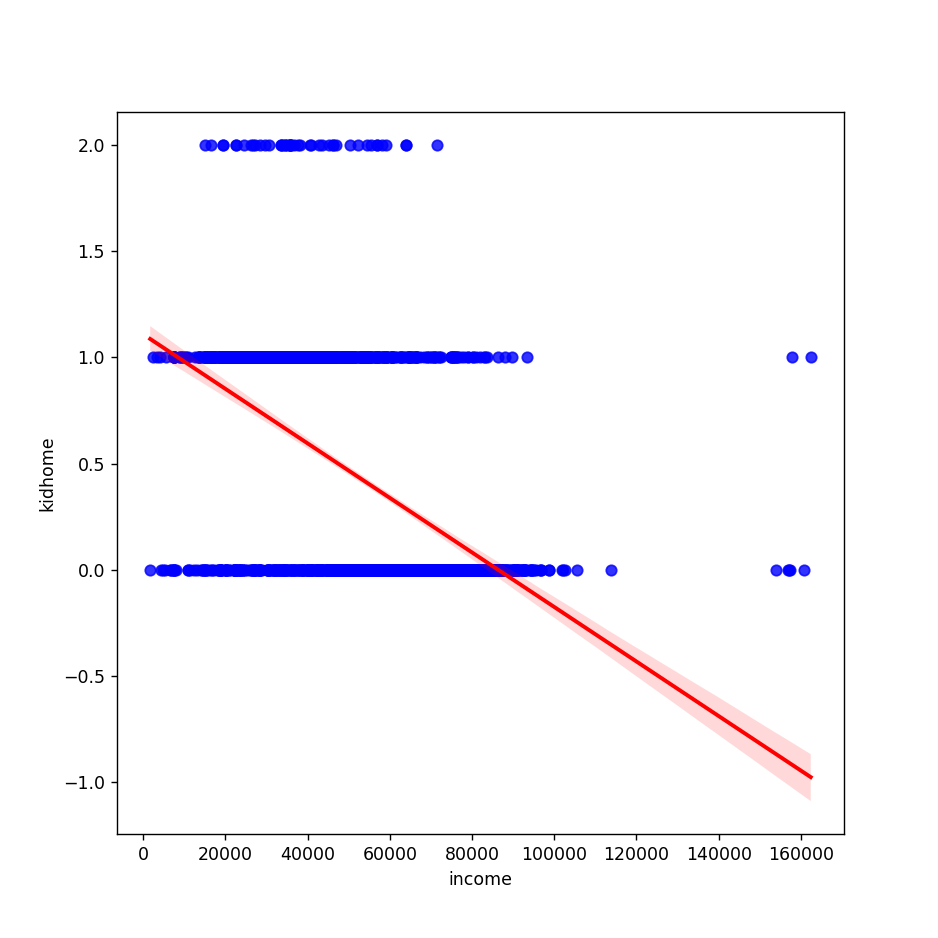

In [153]:
fig, ax = plt.subplots(figsize=(6, 6))

# regression plot of kids vs income
sns.regplot(y=marketing_data["kidhome"], x=marketing_data["income"], 
            scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.show()

There is an evident negative linear correlation, we will check it with the Pearson correlation coefficient.

Note: The Pearson correlation coefficient, if this coefficient is equal to 0.3 there is a linear correlation, if it is greater than 0.6 it suggests a strong linear association.

In [154]:
correlation,p = pearsonr(marketing_data["income"], marketing_data["kidhome"])
print("pearson" + " = "  + str(correlation.round(3)))

pearson = -0.515


In our case there is a negative moderate linear correlation.

4.2.2. Kidhome - amounts spent.

In [155]:
# Create a new dataframe: Group by adding all the "marketing data" rows according to the kidhome column.
kidhome_group_sum = marketing_data.groupby('kidhome').sum().reset_index()

# Remove unnecessary columns.
kidhome_group_sum = kidhome_group_sum.loc[:, ('kidhome', 'mnt_wines', 'mnt_fruits', 'mnt_meat_products', 'mnt_fish_products', 
'mnt_sweet_products', 'mnt_gold_products')]
display(kidhome_group_sum)

,kidhome,mnt_wines,mnt_fruits,mnt_meat_products,mnt_fish_products,mnt_sweet_products,mnt_gold_products
0,0,579458,50407,324552,72084,52014,76812
1,1,92526,7556,43534,10879,7634,19576
2,2,3312,278,1384,316,179,776


In the table above we see that there is a considerable difference in amounts spent by clients who have no children, who have only one, or none. Let's look at this on a side-by-side bar chart.

<IPython.core.display.Javascript object>


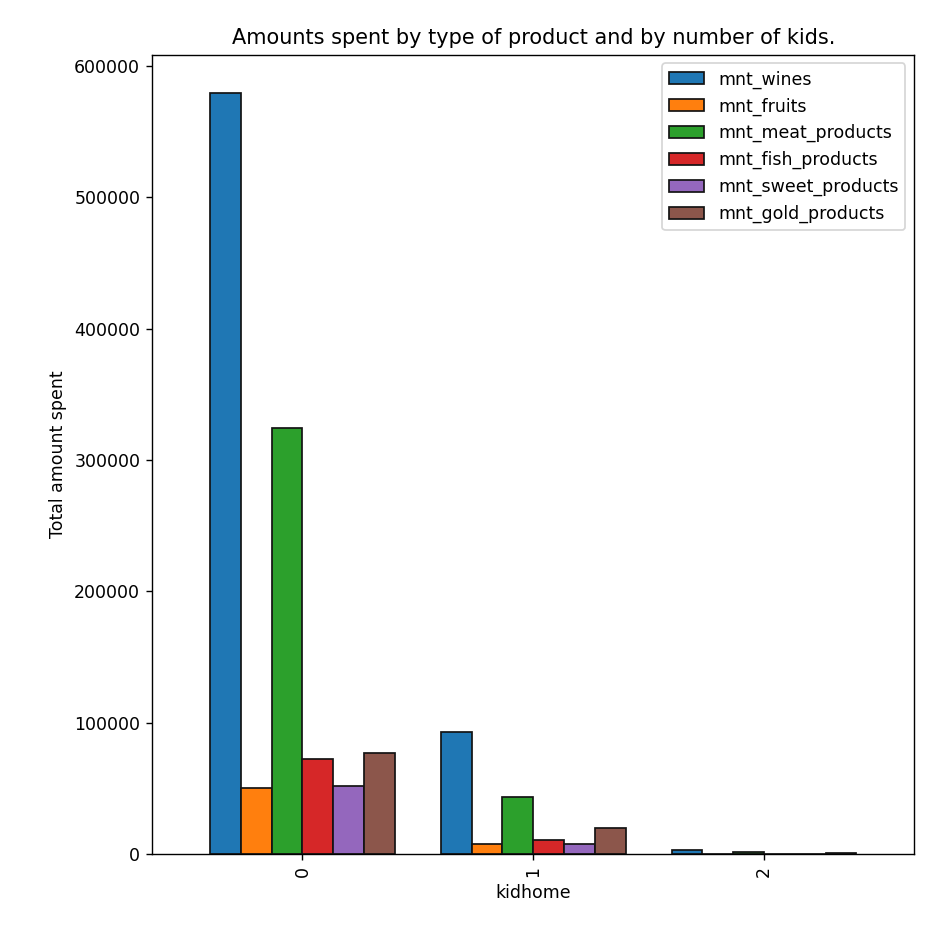

In [156]:
fig, ax = plt.subplots(figsize=(6, 6))

col_products = [
'mnt_wines', 
'mnt_fruits', 
'mnt_meat_products', 
'mnt_fish_products', 
'mnt_sweet_products', 
'mnt_gold_products'
]

# bar chart of amounts spent grouped by the number of children in the household that clients have.
kidhome_group_sum.plot(x='kidhome', y=col_products, kind='bar', ax=ax,  width=0.8, edgecolor='#131313')
plt.title("Amounts spent by type of product and by number of kids.")
plt.ylabel("Total amount spent")
plt.tight_layout()
plt.show()

The bar graph side by side shows us that the total amounts spent are much higher for customers without children, then for the three groups and with respect to products, wines are first, then meats, and in third place the gold products. A graph will be more useful to us instead of the absolute amounts with the relative amounts, in this way we will be able to see the proportions with respect to the total of each of the three groups.

Construct three pie charts for each of the three groups (number of kids): <a class="anchor" id="section4_2_2">

In [157]:
# Transpose data frame: change columns by rows.
kidhome_plus_amounts_transpose = kidhome_group_sum.T.reset_index()
display(kidhome_plus_amounts_transpose)

# Convert column headers to text strings.
kidhome_plus_amounts_transpose.columns = kidhome_plus_amounts_transpose.columns.astype(str)

# Rename column headers, more detail.
dict = {'index':'index','0':'kids=0','1':'kids=1','2':'kids=2'}
kidhome_plus_amounts_transpose.rename(columns=dict,inplace=True)

# Delete the first row, "kidshome" (we don't need it).
kidhome_plus_amounts_transpose = kidhome_plus_amounts_transpose.drop(0)

# View the data frame.
display(kidhome_plus_amounts_transpose)

,index,0,1,2
0,kidhome,0,1,2
1,mnt_wines,579458,92526,3312
2,mnt_fruits,50407,7556,278
3,mnt_meat_products,324552,43534,1384
4,mnt_fish_products,72084,10879,316
5,mnt_sweet_products,52014,7634,179
6,mnt_gold_products,76812,19576,776


,index,kids=0,kids=1,kids=2
1,mnt_wines,579458,92526,3312
2,mnt_fruits,50407,7556,278
3,mnt_meat_products,324552,43534,1384
4,mnt_fish_products,72084,10879,316
5,mnt_sweet_products,52014,7634,179
6,mnt_gold_products,76812,19576,776


<IPython.core.display.Javascript object>


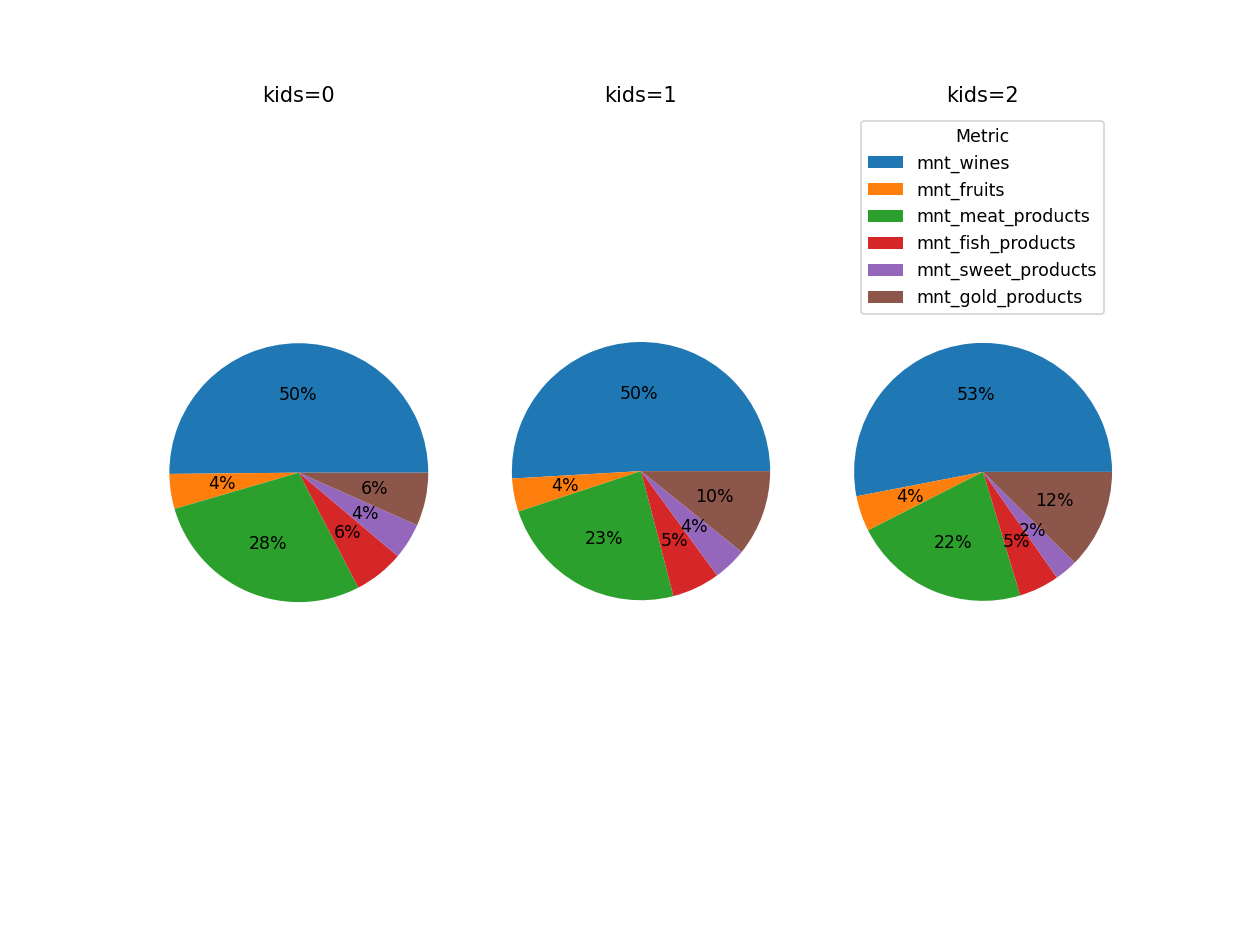

In [158]:
plt.figure(figsize=(8,6))
plt.subplot(131)
plt.pie(kidhome_plus_amounts_transpose['kids=0'], autopct='%1d%%')
plt.title('kids=0')
plt.axis('equal')
plt.subplot(132)
plt.pie(kidhome_plus_amounts_transpose['kids=1'], autopct='%1d%%')
plt.title('kids=1')
plt.axis('equal')
plt.subplot(133)
plt.pie(kidhome_plus_amounts_transpose['kids=2'], autopct='%1d%%')
plt.title('kids=2')

plt.axis('equal')

plt.show()
plt.legend(kidhome_plus_amounts_transpose['index'], loc='upper center', title='Metric')

Now we can better visualize the group of clients with two children, the proportions are similar for the three groups. It is curious to see that clients with two children spend proportionally higher amounts on wines and gold products.

###### 4.3. DtCustomer<a class="anchor" id="section4_3">

DtCustomer, it is the date on which the client registered with the company.

In [159]:
dt_customer = dt_customer.apply(lambda x: (int(x.split('/')[2]))).reset_index()
dt_customer_groupby = dt_customer.groupby("dt_customer").index.count().reset_index()


x = list(dt_customer_groupby["dt_customer"])
y = list(dt_customer_groupby["index"])
print(x)
print(y)

[12, 13, 14]
[490, 1170, 552]


<IPython.core.display.Javascript object>


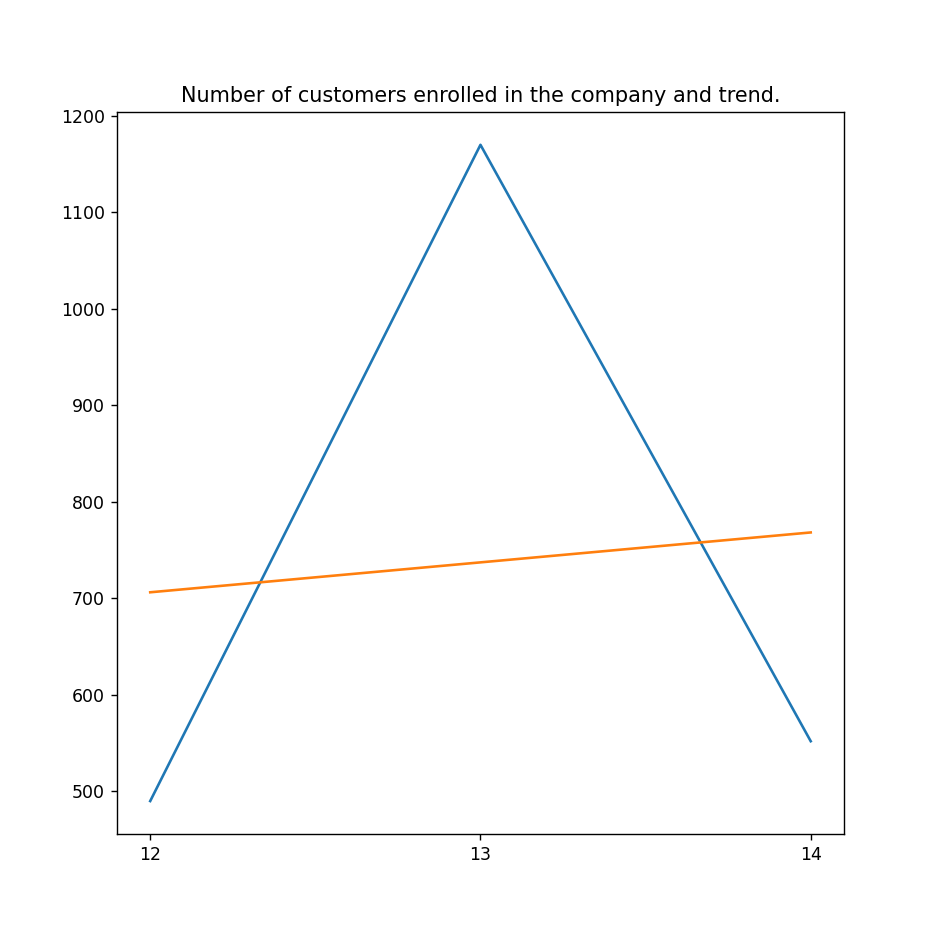

In [160]:
plt.figure(figsize=(6,6))

# Plot the Data itself.

ax = plt.subplot()

plt.plot(x, y)

# Calculate the Trendline
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

# Display the Trendline
plt.plot(x, p(x))

ax.set_xticks(x)
plt.title("Number of customers enrolled in the company and trend.")

plt.show()


###### 4.4. Complain

Is there a client that needs to be paid more attention to? That is to say that he has complained more than the average.

In [161]:
display(marketing_data.groupby(marketing_data.complain).id.count())

complain
0    2192
1      20
Name: id, dtype: int64

The clients who have complained are few, they represent 1% of the total.

In [162]:
# Select only customers who have complained.
complaindf = (marketing_data[marketing_data.complain == 1])

# Group by id and count complaints, to detect customers who have complained more than once.
complaindf = complaindf.groupby("id").complain.count().unique()
print(complaindf)

[1]


Answer: No customer has complained more than once.

### Appendices <a class="anchor" id="conclusion"></a>

###### Note 1: <a class="anchor" id="section6_1">
The correlation analysis between two quantitative variables is performed using a scatter plot, a Pearson correlation coefficient, covariance, and linear regression. Keep in mind that all of them look for the linear relationship between variables, perhaps there is a good correlation but they are far from linearity, in any case we will appreciate this in the scatter plot.
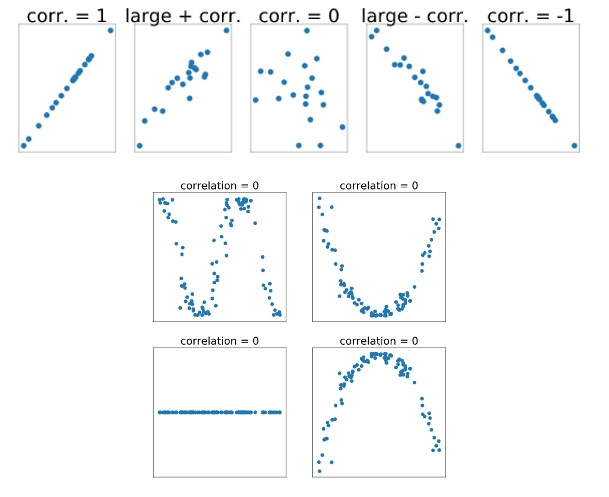

###### Note 2: <a class="anchor" id="section6_2">

How to select the correct hypothesis test.
    
The assumptions that must be taken into account before applying the hypothesis test.
    
Check assumptions.


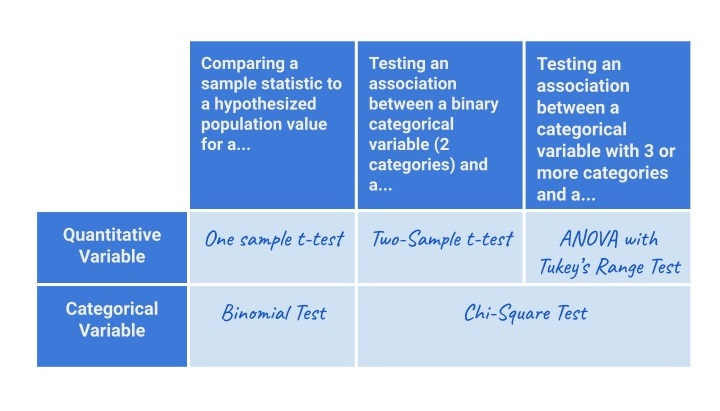


###### Assumptions of T-Tests, ANOVA, and Tukey

Before we use a two sample t-test, ANOVA, or Tukey's range test, we need to be sure that the following things are true:

* A) The observations should be independently randomly sampled from the population.

Suppose the population we are interested in is all visitors to a website. Random sampling will help ensure that our sample is representative of the population we care about. For example, if we only sample site visitors on Halloween, those visitors may behave differently from the general population. In practice, this can be a challenging assumption to meet, but it's important to be aware of.

* B) The standard deviations of the groups should be equal.

For example, if we're comparing time spent on a website for two versions of a homepage, we first want to make sure that the standard deviation of time spent on version 1 is roughly equal to the standard deviation of time spent on version 2. To check this assumption, it is normally sufficient to divide one standard deviation by the other and see if the ratio is “close” to 1. Generally, a ratio between 0.9 and 1.1 should suffice.

That said, there is also a way to run a 2-sample t-test without assuming equal standard deviations — for example, by setting the equal_var parameter in the scipy.stats.ttest_ind() function equal to False. Running the test in this way has some disadvantages (it essentially makes it harder to reject the null hypothesis even when there is a true difference between groups), so it's important to check for equal standard deviations before running the test.

* C) The data should be normally distributed.

Data analysts in the real world often still perform these tests on data that are not normally distributed. This is usually not a problem if sample size is large, but it depends on how non-normal the data is. In general, the bigger the sample size, the safer you are!

* D) The groups created by the categorical variable must be independent.

Here are some examples where the groups are not independent:

The number of goals scored per soccer player before, during, and after undergoing a rigorous training regimen (not independent because the same players are measured in each category).
Years of schooling completed by a group of adults compared to their parents (not independent because kids and their parents can influence one another).
